In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

C:\Users\Koke\AppData\Local\Temp\ipykernel_30416\3535135425.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [4]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [5]:
from Paquetes.visualization import Eda
train_eda = Eda(train)

In [6]:
train_eda.infocat

__________________________________________________________________
Categorias para la columna == Drug:  ['Placebo', 'D-penicillamine']
Frecuencia de las categorias : 
 Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Numero de categorias en la columna == Drug ---  2
Numero de valores nulos en la columna == Drug ---  0
Informacion generica == Drug : 
  count        7905
unique          2
top       Placebo
freq         4010
Name: Drug, dtype: object
__________________________________________________________________
__________________________________________________________________
Categorias para la columna == Sex:  ['F', 'M']
Frecuencia de las categorias : 
 Sex
F    7336
M     569
Name: count, dtype: int64
Numero de categorias en la columna == Sex ---  2
Numero de valores nulos en la columna == Sex ---  0
Informacion generica == Sex : 
  count     7905
unique       2
top          F
freq      7336
Name: Sex, dtype: object
___________________________________

__________________________________________________________________
Numero de valores diferentes en la columna == N_Days ---  461
Tamaño de la columna == N_Days ---  7905
% de valores unicos frente al numero de muestras de la columna == N_Days ---  5.832 %
Media de la columna == N_Days ---  2030.1733
------------------------------------------------------------------
Maximo valor de la columna == N_Days ---  4795
Informacion del maximo valor en la columna : N_Days:
 N_Days            4795.00
Age              19025.00
Bilirubin            1.00
Cholesterol        331.00
Albumin              3.70
Copper              54.00
Alk_Phos           466.00
SGOT                99.33
Tryglicerides      133.00
Platelets          243.00
Prothrombin         10.60
Stage                3.00
Name: 565, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == N_Days ---   0
Numero de valores '0' en la columna == N_Days ---   0
Porcentaje de va

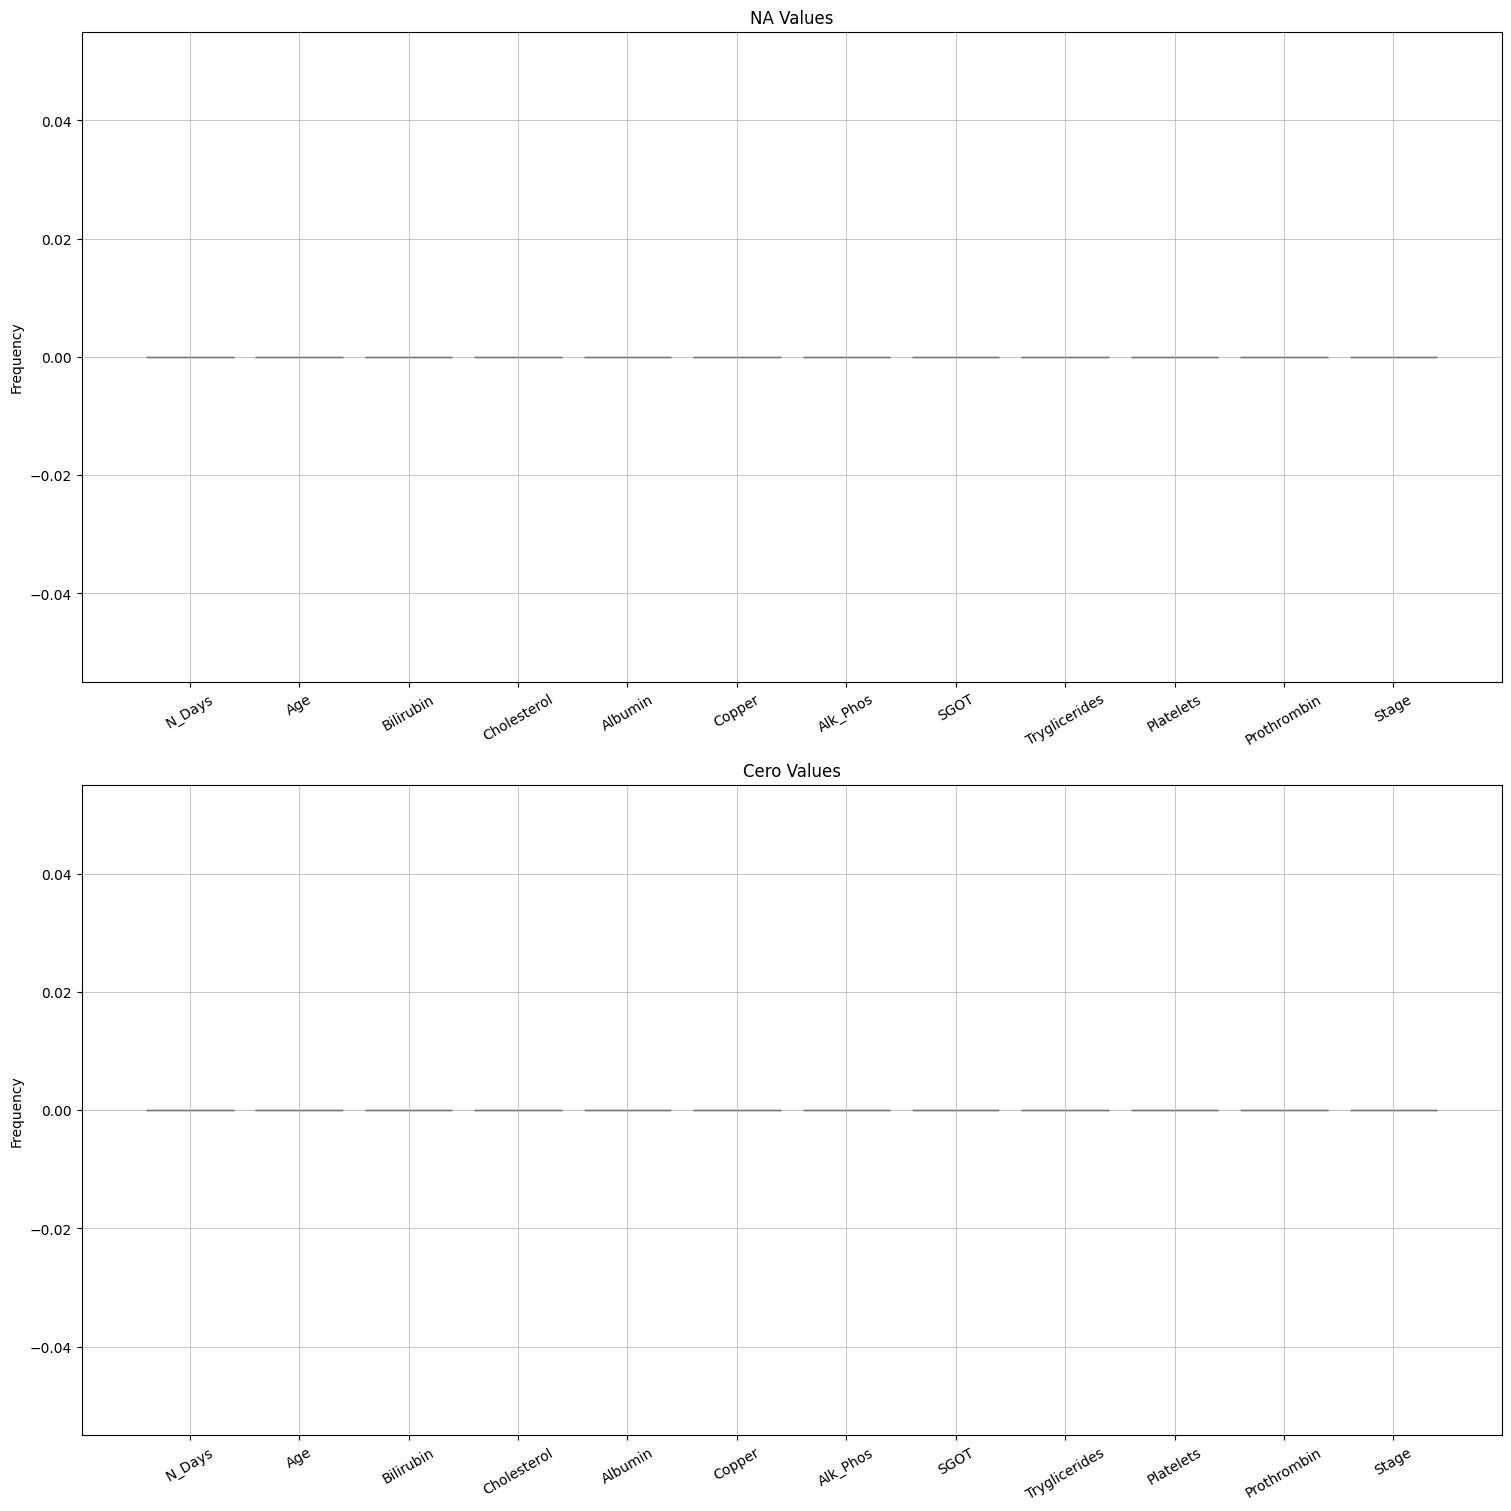

In [7]:
fture_num_df_info = train_eda.infonum

In [8]:
fture_num_df_info.head(12)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
COUNT,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
MIN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
MAX,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000
MEAN,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
STD,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA %,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


EDA CONTINUAR ...

Tratamiento del desbalanceo de clases:

In [9]:
# Proporciones de las status clases dentro de la status feature para estudiar analiticamente el posible desbalanceo de clases 
print(f"Clases : {train_eda.data['Status'].unique()}")
for _ ,unique in enumerate(train_eda.data["Status"].unique()):
    print(f'Proporción de la clase {unique} : {round(100 *train_eda.data["Status"][train_eda.data["Status"]== unique].shape[0]/train_eda.data["Status"].shape[0],3)} %')


Clases : ['D' 'C' 'CL']
Proporción de la clase D : 33.713 %
Proporción de la clase C : 62.808 %
Proporción de la clase CL : 3.479 %


MUY DESBALANCEADO EN LA CLASE CL

In [10]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.0


INICIA TRATAMIENTO DE CLASES DESBALANCEADAS

PASOS:
1. Codificación de las variables nominales para la aplicación posterior de algoritmos de sobremuestreo sintéticos de la clase minoritaria (dado que, estos no soportan variables nominales o categóricas). Nota: se debe aplicar la codificación que se vaya a incluir en el pipeline final, debido a que serán estas features codificadas con cierta técnica las que se usen para la generación de nuevas muestras de la clase minoritaria. Si no se usase la misma codificación, el dataset utilizado para el resample y el dataset usado para el entrenamiento no coincidirían.
2. Se aplican:
   - Diferentes técnicas de resample.
   - Diferentes algoritmos de clasificación multiclase.
   - Diferentes técnicas de cross validation.
   - Diferentes métricas de evaluación de performance de estos algoritmos tanto en el conjunto de train como en el conjunto de test (este último no está sobremuestreado con el objetivo de ver la capacidad de generalización sobre el dataset con las proporción de clases desbalanceadas originales).
3. Se elige la mejor técnica de resample, que es la que se va a aplicar sobre el conjunto de train finalmente.

Nota: Cabe destacar que para no generar unas métricas excesivamente elevadas en el train set sobremuestreado comparado con el test set no sobremuestreado, el aumento de muestras de la clase
minoritaria no será muy drástico. 
Duda: Aplicar resample a todo el dataset o solo al conjunto de train?

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lab_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop = 'if_binary', sparse_output=False)

data_for_onehot = train_eda.cat_data.drop(columns=["Edema", "Status"]).values
columns_for_onehot = train_eda.cat_data.drop(columns=["Edema", "Status"]).columns
print(columns_for_onehot)

data_for_label_encd = train_eda.cat_data["Edema"].values

y_no_encoded = train_eda.cat_data["Status"].values

# Encoding features
one_hot_encoded_data = one_hot_encoder.fit_transform(data_for_onehot)
label_encoded_data =(lab_encoder.fit_transform(data_for_label_encd)).reshape(-1,1)
print(one_hot_encoded_data)
print(one_hot_encoded_data.shape)
print(label_encoded_data.shape)

encoded_features = pd.DataFrame(
    
                                data=  np.hstack((one_hot_encoded_data, label_encoded_data)),
                                columns= list(one_hot_encoder.get_feature_names_out(input_features=columns_for_onehot)) + ['Edema'])


# Encoding target 
print("Target old classes : ", train_eda.data["Status"].unique())
y_encoded = lab_encoder.fit_transform(y_no_encoded)

# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases : {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0]:.3f}', '%')


Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders'], dtype='object')
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(7905, 5)
(7905, 1)
Target old classes :  ['D' 'C' 'CL']
New codify classes :  [0 1 2]
Frecuencia de clases : [4965  275 2665]
Proporción de la clase 0 : 62.808 %
Proporción de la clase 1 : 3.479 %
Proporción de la clase 2 : 33.713 %


In [12]:
# Comprobar correcta codificacion
print(train_eda.cat_data.head())
encoded_features.head()

              Drug Sex Ascites Hepatomegaly Spiders Edema Status
0  D-penicillamine   M       N            N       N     N      D
1          Placebo   F       N            N       N     N      C
2          Placebo   F       N            Y       Y     Y      D
3          Placebo   F       N            N       N     N      C
4          Placebo   F       N            Y       N     N      C


,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# Juntar: categorias numericas y nominales codificadas:
X = encoded_features.join( other = train_eda.num_data, how = 'right')
y = y_encoded

In [14]:
X.head()

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.0,1.0,0.0,0.0,0.0,0.0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,1.0,0.0,0.0,1.0,1.0,2.0,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,1.0,0.0,0.0,0.0,0.0,0.0,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,1.0,0.0,0.0,1.0,0.0,0.0,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


In [15]:
print(X.shape)
print(y.shape)

(7905, 18)
(7905,)


In [16]:
# Split test y train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values,y_encoded,test_size=0.2, random_state=42, shuffle=True, stratify = y_encoded )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6324, 18) (6324,) (1581, 18) (1581,)


In [17]:
# Aseguramos proporciones de las clases de nuevo en test y train
print("New codify classes : ", np.unique(y_train))
print(f"Frecuencia de clases : {np.bincount(y_train)}")
for idx, v in enumerate(np.bincount(y_train)):
    print(f'Proporción de la clase {idx} : {100*v/y_train.shape[0] : .3f}','%')

New codify classes :  [0 1 2]
Frecuencia de clases : [3972  220 2132]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [18]:
# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_test))
print(f"Frecuencia de clases : {np.bincount(y_test)}")
for idx, v in enumerate(np.bincount(y_test)):
    print(f'Proporción de la clase {idx} : {100*v/y_test.shape[0] : .3f}','%')

New codify classes :  [0 1 2]
Frecuencia de clases : [993  55 533]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [19]:
from Paquetes.imbalanced import synthetic_resample

In [20]:
# resampling loop: create several data sets with diferents resampling techniques
tecniques = ["SMOTE","ADASYN","BorderlineSMOTE","SVMSMOTE"]
resampled_train_sets = {t: synthetic_resample(X = X_train,y  = y_train,ratio = 0.3 ,technique = t, verbose  = 0) for _ , t in enumerate(tecniques)}

In [21]:
# Undersampling
X_usampled , yusampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "undersampling",
                            verbose  = 1
                            )
print(X_usampled.shape, yusampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 18)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (3543, 18)
y resampled shape :  (3543,)
New dataset number of samples : 3543
% of increment compare to original dataset : -43.98 %
Target classes :  [0 1 2]
New class frequencies : [1191  220 2132]
New proportion of class 0 :  33.62 %
New proportion of class 1 :  6.21 %
New proportion of class 2 :  60.17 %
(3543, 18) (3543,)


In [22]:
# Oversampling
X_osampled , y_osampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.2 ,
                            technique = "oversampling",
                            verbose  = 1
                            )
print(X_osampled.shape, y_osampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 18)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (6898, 18)
y resampled shape :  (6898,)
New dataset number of samples : 6898
% of increment compare to original dataset : 9.08 %
Target classes :  [0 1 2]
New class frequencies : [3972  794 2132]
New proportion of class 0 :  57.58 %
New proportion of class 1 :  11.51 %
New proportion of class 2 :  30.91 %
(6898, 18) (6898,)


In [23]:
# SMOTE
X_smoted , y_smoted = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "SMOTE",
                            verbose  = 1
                            )
print(X_smoted.shape, y_smoted.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 18)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
Using: SMOTE resampling technique
-----------------------------------------------------------
X resampled shape :  (7295, 18)
y resampled shape :  (7295,)
New dataset number of samples : 7295
% of increment compare to original dataset : 15.35 %
Target classes :  [0 1 2]
New class frequencies : [3972 1191 2132]
New proportion of class 0 :  54.45 %
New proportion of class 1 :  16.33 %
New proportion of class 2 :  29.23 %
(7295, 18) (7295,)


In [24]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.1, random_state=1)
log_reg  = LogisticRegression(penalty = None,random_state=1,multi_class ='ovr',n_jobs = -1)
rdf_tree = RandomForestClassifier(   
                                    n_estimators=100,
                                    criterion='entropy', 
                                    max_depth=6, 
                                    min_samples_split=3,
                                    bootstrap=True, 
                                    oob_score=False, 
                                    n_jobs=-1, 
                                    random_state=42, 
        
                                  )

pipe = Pipeline(
                    steps=[
                                ("estimator",ada)
                            ]
                    )
pipe2 = Pipeline(
                    steps=[
                                ("estimator",log_reg)
                            ]
                    )



In [25]:
# Train each pipeline on each resampled datset and evaluate cv metrics and generalization metrics:

pipelines = [ada,rdf_tree]

for r_technique,train_set in resampled_train_sets.items():
    for _, pipe in enumerate(pipelines):
        pipe.fit(train_set[0],train_set[1])

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the defa

In [26]:
from Paquetes.metrics import  clasification_metrics

metrics_list = {}   
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'weighted',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 0.688274621963501
Exexcution time of clasification_metrics 0.9318532943725586
Exexcution time of clasification_metrics 0.6842789649963379
Exexcution time of clasification_metrics 0.7287685871124268


In [27]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [28]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.898012,0.902849,0.896547,NaN,0.89733
Test,0.807717,0.798505,0.794391,NaN,0.782611
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.807814,0.818755,0.800821,NaN,0.812049
Test,0.810879,0.802494,0.800284,NaN,0.787745
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.897093,0.901735,0.895543,NaN,0.896306
Test,0.807717,0.798505,0.794391,NaN,0.782611


**Cometarios de las metricas y los metodos resampled:**
- investigar mediante EDA si es un problema linealmente separable o no pq ciertos algoritmos de resampling se enfocan en las muestras de clase minoritaria cercanas a la decision boundary o 
muestras didficiles de clasificar (que en la practica es lo mismo)

In [29]:
from Paquetes.metrics import  clasification_metrics

metrics_list = {}     
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'micro',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 0.9897329807281494
Exexcution time of clasification_metrics 0.9169228076934814
Exexcution time of clasification_metrics 0.7734208106994629
Exexcution time of clasification_metrics 0.7055566310882568


In [30]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [31]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.898012,0.898012,0.898012,NaN,0.923157
Test,0.807717,0.807717,0.807717,NaN,0.854436
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.807814,0.807814,0.807814,NaN,0.85451
Test,0.810879,0.810879,0.810879,NaN,0.856856
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.897093,0.897093,0.897093,NaN,0.922461
Test,0.807717,0.807717,0.807717,NaN,0.854436


In [32]:
from Paquetes.metrics import  clasification_metrics
     
metrics_list = {} 
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'macro',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 0.8845694065093994
Exexcution time of clasification_metrics 0.6846206188201904
Exexcution time of clasification_metrics 0.6869714260101318
Exexcution time of clasification_metrics 0.6700758934020996


In [33]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [34]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.866649,0.926216,0.891681,NaN,0.898515
Test,0.559338,0.723626,0.575746,NaN,0.69168
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.734135,0.846368,0.77039,NaN,0.801345
Test,0.583627,0.726174,0.611289,NaN,0.707934
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.864038,0.925158,0.889704,NaN,0.896832
Test,0.559338,0.723626,0.575746,NaN,0.69168


In [35]:
from Paquetes.cross_validate import cv_function

pipelines = [tree, ada, log_reg, rdf_tree]
metrics = [
                'accuracy', 
                'precision_micro',
                'precision_macro',
                'recall_micro',
                'recall_macro',
                'f1_micro',
                'f1_macro',
                'jaccard_micro',
                'jaccard_macro',
                'roc_auc_ovr',
                'roc_auc_ovo',
                'roc_auc_ovr_weighted',
                'roc_auc_ovo_weighted'
            ]
cv_str = ['k-folds', 'Stratified K-folds']

scores = cv_function(
                        X_train = X_osampled, 
                        y_train = y_osampled, 
                        n_splits=5,
                        pipelines = pipelines, 
                        metrics = metrics,
                        cv_strategies = cv_str,
                        random_state =  0,
                        shuffle = True,
                        group_by = X_osampled[:,2]
                    )
print(scores[f"{list(scores.keys())[0]}"].head(30))

                           k-folds Stratified K-folds
DecisionTreeClassifier         NaN                NaN
Val accuracy                 0.749              0.752
Val precision_micro          0.749              0.752
Val precision_macro          0.699              0.694
Val recall_micro             0.749              0.752
Val recall_macro             0.673              0.663
Val f1_micro                 0.749              0.752
Val f1_macro                 0.677              0.672
Val jaccard_micro            0.599              0.603
Val jaccard_macro            0.525              0.521
Val roc_auc_ovr              0.861              0.867
Val roc_auc_ovo              0.852              0.859
Val roc_auc_ovr_weighted     0.858              0.862
Val roc_auc_ovo_weighted     0.857              0.863
Train accuracy               0.779               0.78
Train precision_micro        0.779               0.78
Train precision_macro        0.733              0.736
Train recall_micro          

In [36]:
scores.keys()
    

dict_keys(['Pipeline : 0', 'Pipeline : 1', 'Pipeline : 2', 'Pipeline : 3'])

In [37]:
scores[f"{list(scores.keys())[0]}"].head(30)

,k-folds,Stratified K-folds
DecisionTreeClassifier,NaN,NaN
Val accuracy,0.749,0.752
Val precision_micro,0.749,0.752
Val precision_macro,0.699,0.694
Val recall_micro,0.749,0.752
Val recall_macro,0.673,0.663
Val f1_micro,0.749,0.752
Val f1_macro,0.677,0.672
Val jaccard_micro,0.599,0.603
Val jaccard_macro,0.525,0.521


In [38]:
scores[f"{list(scores.keys())[1]}"].head(30)

,k-folds,Stratified K-folds
AdaBoostClassifier,NaN,NaN
Val accuracy,0.835,0.841
Val precision_micro,0.835,0.841
Val precision_macro,0.863,0.869
Val recall_micro,0.835,0.841
Val recall_macro,0.838,0.844
Val f1_micro,0.835,0.841
Val f1_macro,0.848,0.854
Val jaccard_micro,0.716,0.726
Val jaccard_macro,0.749,0.757


In [39]:
scores[f"{list(scores.keys())[2]}"].head(30)

,k-folds,Stratified K-folds
LogisticRegression,NaN,NaN
Val accuracy,0.702,0.696
Val precision_micro,0.702,0.696
Val precision_macro,0.593,0.531
Val recall_micro,0.702,0.696
Val recall_macro,0.502,0.496
Val f1_micro,0.702,0.696
Val f1_macro,0.486,0.478
Val jaccard_micro,0.541,0.534
Val jaccard_macro,0.378,0.372


In [40]:
scores[f"{list(scores.keys())[3]}"].head(30)

,k-folds,Stratified K-folds
RandomForestClassifier,NaN,NaN
Val accuracy,0.783,0.784
Val precision_micro,0.783,0.784
Val precision_macro,0.804,0.808
Val recall_micro,0.783,0.784
Val recall_macro,0.65,0.653
Val f1_micro,0.783,0.784
Val f1_macro,0.686,0.69
Val jaccard_micro,0.643,0.645
Val jaccard_macro,0.541,0.546


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 1.163606882095337


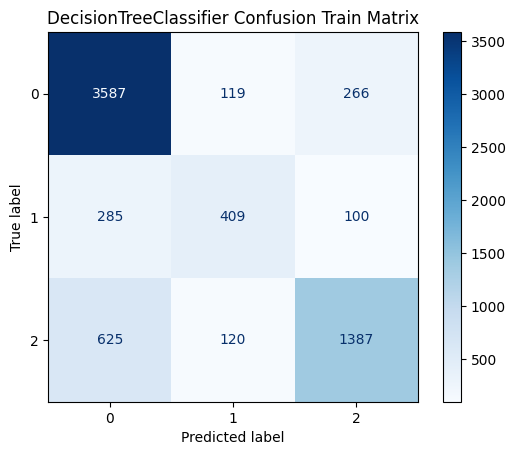

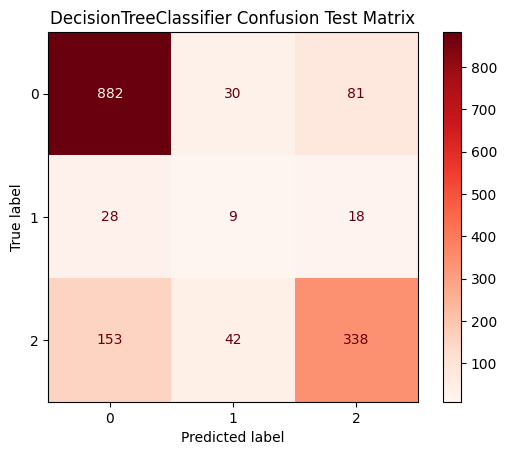

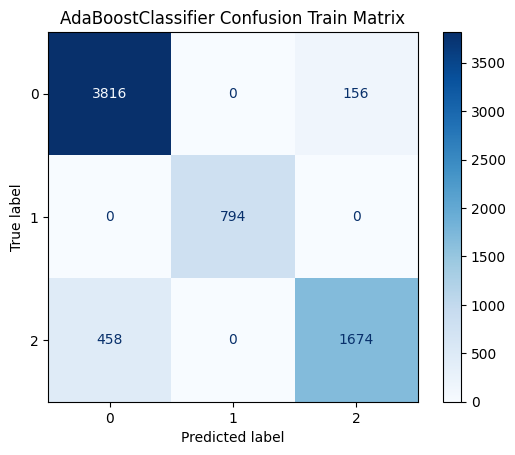

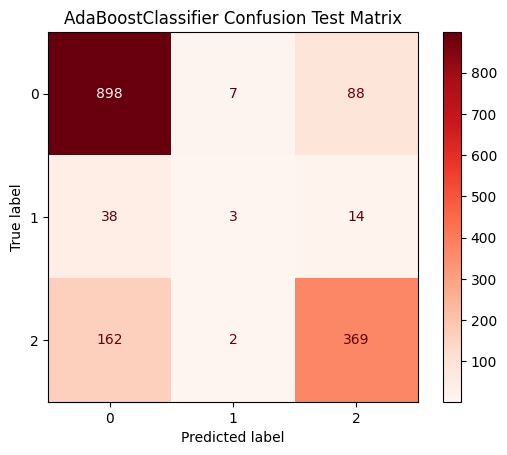

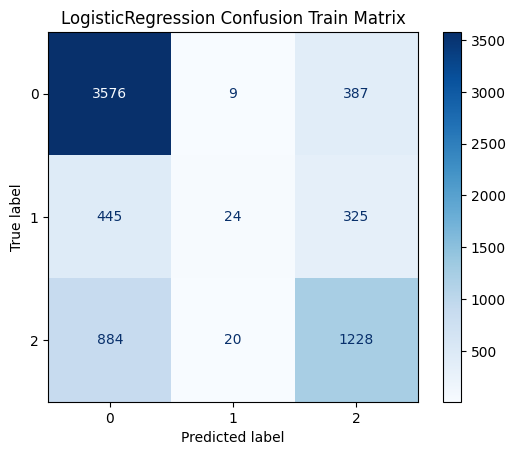

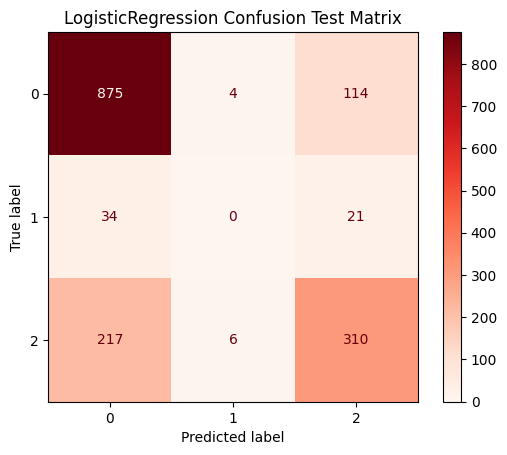

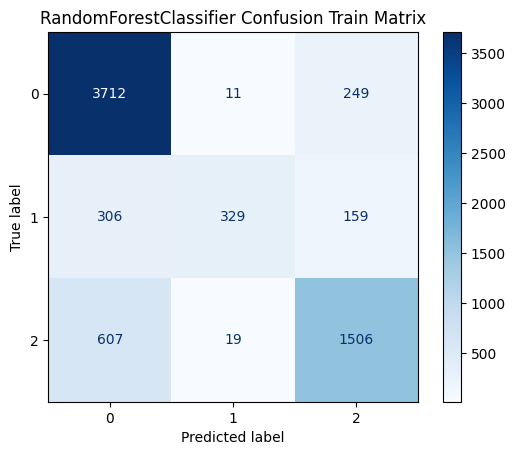

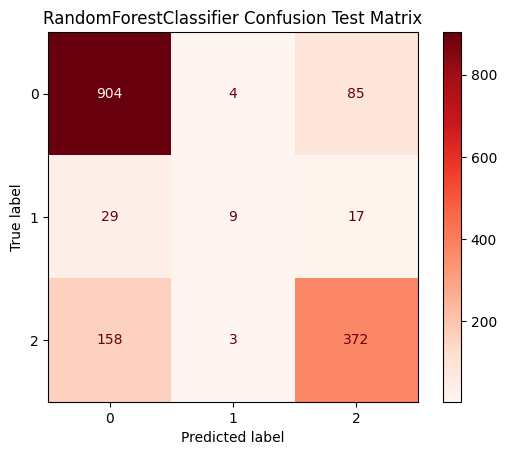

In [41]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_osampled, y_osampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_osampled,
                                        x_train= X_osampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'micro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" ,
                                                        "geometric_mean_score"
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [42]:
# Micro 
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex  \
DecisionTreeClassifier       NaN       NaN       NaN          NaN   
Train                   0.780371  0.780371  0.780371     0.639843   
Test                    0.777356  0.777356  0.777356     0.635799   

                       geometric_mean_score  
DecisionTreeClassifier                  NaN  
Train                              0.833472  
Test                               0.831155  
                      Recall Precision   F1Score JaccardIndex  \
AdaBoostClassifier       NaN       NaN       NaN          NaN   
Train               0.910989  0.910989  0.910989     0.836528   
Test                0.803289  0.803289  0.803289     0.671247   

                   geometric_mean_score  
AdaBoostClassifier                  NaN  
Train                          0.932976  
Test                           0.851047  
                      Recall Precision   F1Score JaccardIndex  \
LogisticRegression       NaN       NaN       

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 1.1773805618286133


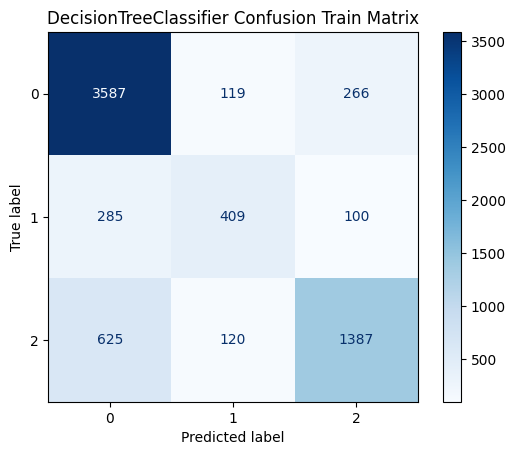

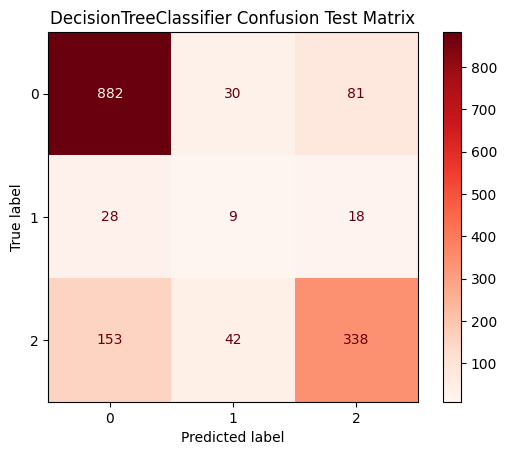

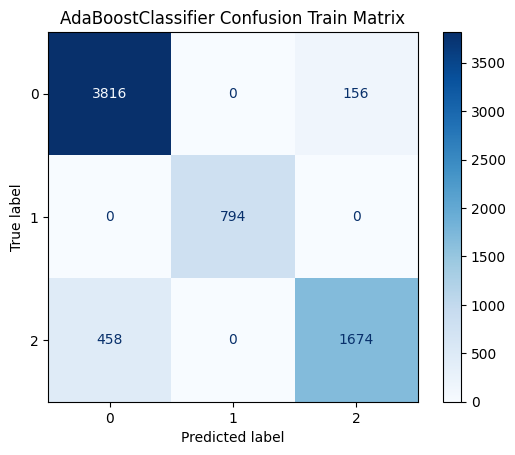

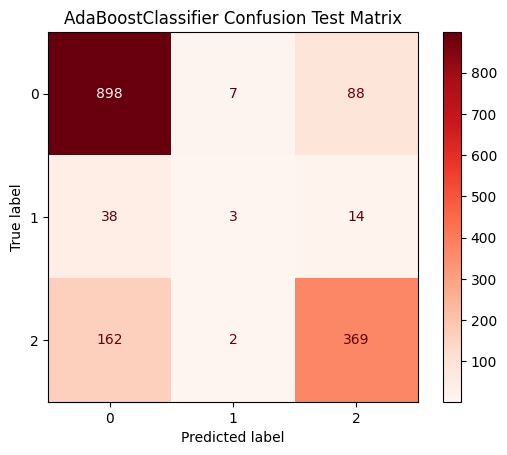

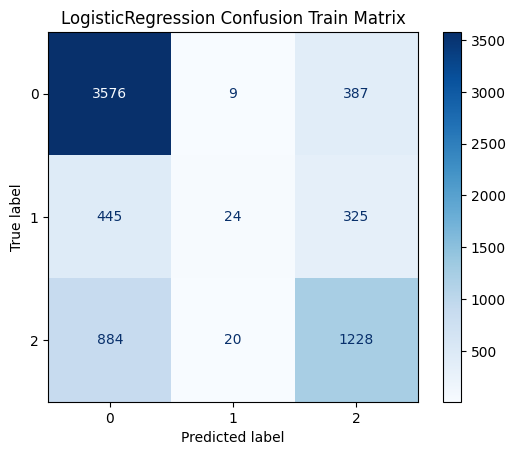

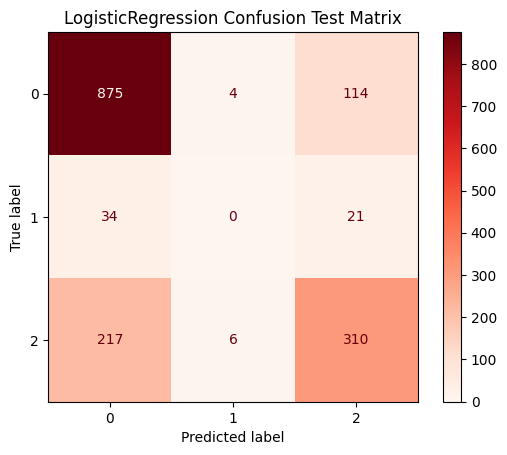

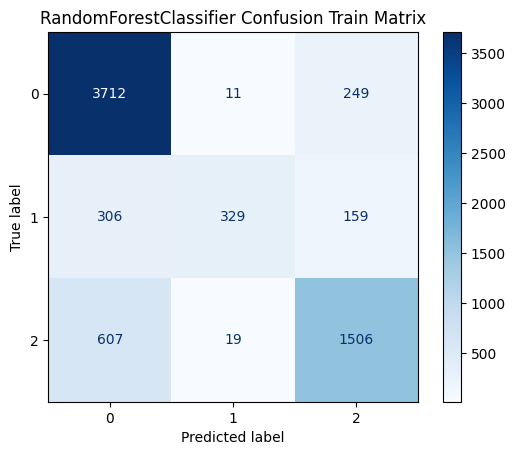

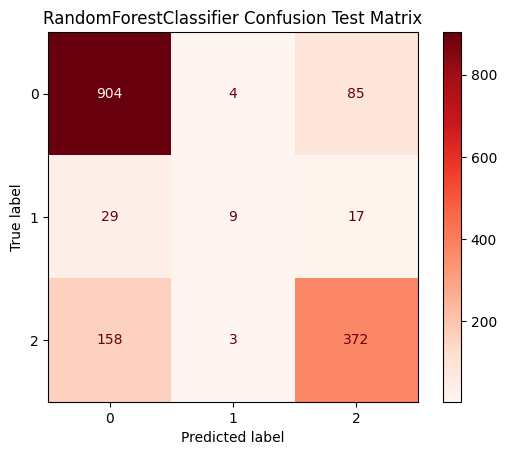

In [43]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_osampled, y_osampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_osampled,
                                        x_train= X_osampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'macro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [44]:
# macro
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex  \
DecisionTreeClassifier       NaN       NaN       NaN          NaN   
Train                   0.689583   0.74001  0.709462     0.561973   
Test                       0.562  0.571431  0.562412     0.452318   

                       geometric_mean_score  
DecisionTreeClassifier                  NaN  
Train                                   NaN  
Test                                    NaN  
                      Recall Precision   F1Score JaccardIndex  \
AdaBoostClassifier       NaN       NaN       NaN          NaN   
Train               0.915301  0.935865  0.923522     0.864348   
Test                0.550394  0.617097  0.561177     0.460234   

                   geometric_mean_score  
AdaBoostClassifier                  NaN  
Train                               NaN  
Test                                NaN  
                      Recall Precision   F1Score JaccardIndex  \
LogisticRegression       NaN       NaN       

FEATURE SELECTION
1. Sequential feature selection (Wrapper): 
 - estimators : RandomForest and SVC 
2. Forest family selector
- estimators/clasifiers from tree family: 
    ExtraTreeClassifier,
    GradientBoostingClassifier
3. pca

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector

# Estimators
SQS_estimators = [
                    (
                        'RandomForestClassifier',
                        RandomForestClassifier(
                                                    n_estimators=100, 
                                                    max_depth=10, 
                                                    min_samples_split=5,
                                                    class_weight='balanced',
                                                    max_features='sqrt', 
                                                    random_state=42,
                                                    n_jobs=-1

                                                
                                                )
                     ),
                    (
                        'SVC',
                        SVC(
                                kernel='rbf', 
                                class_weight='balanced', 
                                probability=True, 
                                random_state=42,
   

                        )
                    )
                    
                
                ]


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [67]:

selected_features = {}
for  _,stm in enumerate(SQS_estimators):
    
    # Sequential feature selector
    sfs = SequentialFeatureSelector(
                                        estimator  =stm[1], 
                                        n_features_to_select = 5, 
                                        direction='backward',
                                        cv = 5,
                                        n_jobs = -1
                                    )

    # Fit to the training data
    sfs.fit(X_std, y)

    # Transformed features
    selected_features[stm[0]] = X.columns[sfs.get_support(indices=False)]

print(selected_features)

{'RandomForestClassifier': Index(['N_Days', 'Age', 'Bilirubin', 'Copper', 'Prothrombin'], dtype='object'), 'SVC': Index(['N_Days', 'Cholesterol', 'Copper', 'SGOT', 'Tryglicerides'], dtype='object')}


**Forest family selectors :** 

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(
                            n_estimators=100, 
                            criterion='entropy', 
                            max_depth=10,
                            min_samples_split=5, 
                            min_samples_leaf=1,
                            class_weight='balanced',
                            max_features='sqrt', 
                            random_state=42
                            )

clf = clf.fit(X, y_encoded)
feature_importances_indx = list(np.argsort(clf.feature_importances_  ).flatten())
feature_importances_indx.reverse()
features_sorted_by_importance_etc = X.columns[feature_importances_indx] 
model = SelectFromModel(    
                        estimator = clf, 
                        threshold = 'mean',
                        importance_getter = 'auto',
                        max_features = 5,
                        prefit=True
                        )
X_new = model.transform(X)
X_new.shape               

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(7905, 5)

In [92]:
features_sorted_by_importance_etc 

Index(['Bilirubin', 'Age', 'Hepatomegaly_Y', 'N_Days', 'Copper', 'Edema',
       'Stage', 'SGOT', 'Prothrombin', 'Spiders_Y', 'Cholesterol', 'Platelets',
       'Drug_Placebo', 'Ascites_Y', 'Tryglicerides', 'Albumin', 'Alk_Phos',
       'Sex_M'],
      dtype='object')

In [71]:
importance_by_feature = pd.DataFrame(data = clf.feature_importances_.reshape(1,-1), columns = list(X.columns))

In [72]:
importance_by_feature.head()

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.03107,0.025213,0.030024,0.101316,0.049926,0.061205,0.092542,0.101871,0.109605,0.038046,0.028233,0.078389,0.025708,0.055161,0.029992,0.033752,0.05136,0.056586


In [77]:
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier

In [98]:
clf = BalancedRandomForestClassifier(
                            n_estimators=100, 
                            criterion='entropy', 
                            max_depth=10, 
                            min_samples_split=5, 
                             min_samples_leaf=1,
                            max_features='sqrt', 
                            sampling_strategy='auto',
                            replacement=True,
                            n_jobs=-1, 
                            random_state=42, 
                            class_weight='balanced',
)

clf = clf.fit(X, y_encoded)
feature_importances_indx = list(np.argsort(clf.feature_importances_  ).flatten())
feature_importances_indx.reverse()
features_sorted_by_importance_brf = X.columns[feature_importances_indx] 
model = SelectFromModel(    
                        estimator = clf, 
                        threshold = 'mean',
                        importance_getter = 'auto',
                        max_features = 5,
                        prefit=True
                        )
X_new = model.transform(X)
X_new.shape   

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\imblearn\ensemble\_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(7905, 5)

In [99]:
features_sorted_by_importance_brf 

Index(['Age', 'Bilirubin', 'N_Days', 'SGOT', 'Copper', 'Alk_Phos', 'Platelets',
       'Prothrombin', 'Tryglicerides', 'Cholesterol', 'Albumin', 'Stage',
       'Edema', 'Hepatomegaly_Y', 'Drug_Placebo', 'Spiders_Y', 'Ascites_Y',
       'Sex_M'],
      dtype='object')

In [80]:
importance_by_feature = pd.DataFrame(data = clf.feature_importances_.reshape(1,-1), columns = list(X.columns))
importance_by_feature.head()

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.007773,0.004727,0.00511,0.014075,0.007556,0.01642,0.102222,0.141341,0.123468,0.060442,0.054011,0.077162,0.0734,0.090705,0.060599,0.072383,0.069042,0.019566


In [100]:
clf =RUSBoostClassifier(
                           estimator = RandomForestClassifier(
                                                            n_estimators=100, 
                                                            max_depth=10, 
                                                            min_samples_split=5,
                                                            class_weight='balanced',
                                                            max_features='sqrt', 
                                                            random_state=42,
                                                            n_jobs=-1
                                                             ), 
                           n_estimators=50, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R', 
                           sampling_strategy='auto', 
                           replacement=False, 
                           random_state=42
)

clf = clf.fit(X, y_encoded)
feature_importances_indx = list(np.argsort(clf.feature_importances_  ).flatten())
feature_importances_indx.reverse()
features_sorted_by_importance_rbc = X.columns[feature_importances_indx] 
model = SelectFromModel(    
                        estimator = clf, 
                        threshold = 'mean',
                        importance_getter = 'auto',
                        max_features = 5,
                        prefit=True
                        )
X_new = model.transform(X)
X_new.shape   

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(7905, 5)

In [101]:
clf.feature_importances_.reshape(1,-1)

array([[0.00888266, 0.00602629, 0.00109419, 0.03013313, 0.01607016,
        0.00773476, 0.07459904, 0.08404959, 0.14417498, 0.06589731,
        0.05602524, 0.09699896, 0.07194456, 0.08135605, 0.0678335 ,
        0.06816152, 0.09600141, 0.02301666]])

In [102]:
features_sorted_by_importance_rbc 

Index(['Bilirubin', 'Copper', 'Prothrombin', 'Age', 'SGOT', 'N_Days',
       'Alk_Phos', 'Platelets', 'Tryglicerides', 'Cholesterol', 'Albumin',
       'Hepatomegaly_Y', 'Stage', 'Spiders_Y', 'Drug_Placebo', 'Edema',
       'Sex_M', 'Ascites_Y'],
      dtype='object')

In [88]:
importance_by_feature = pd.DataFrame(data = clf.feature_importances_.reshape(1,-1), columns = list(X.columns))
importance_by_feature.head()

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.007424,0.007343,0.000835,0.032157,0.015934,0.007495,0.072895,0.084013,0.151636,0.064161,0.055618,0.101372,0.067016,0.079463,0.069059,0.068644,0.094021,0.020914


**PCA study :**

In [73]:
from Paquetes.dimensionality_reduction import PCAStudy
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder

pc_std = PCAStudy(data =X , encoder = OneHotEncoder(), pca_components = 10 , num_transformer = StandardScaler(),verbose  = 1)
pc_minmax = PCAStudy(data =X , encoder = OneHotEncoder(), pca_components = 10 , num_transformer = MinMaxScaler(),verbose  = 1)

combinations [(OneHotEncoder(), StandardScaler(), 10)]
Columns with NA  []
No NA values in the dataframe
Numero de features tras step ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [])]):  18
Numero de features tras step StandardScaler():  18
-----------------------------------------------------------------
Number of PCA components choosen after using OneHotEncoder(): 10
Explained variance ratio: 
 [0.22139288 0.09477022 0.0695761  0.06293818 0.05669947 0.05468298
 0.04952186 0.04621872 0.04541155 0.04482889]
Fraction of original variance (or information) kept by each principal component axis (or image vector) after apllying OneHotEncoder() : 0.746
-----------------------------------------------------------------


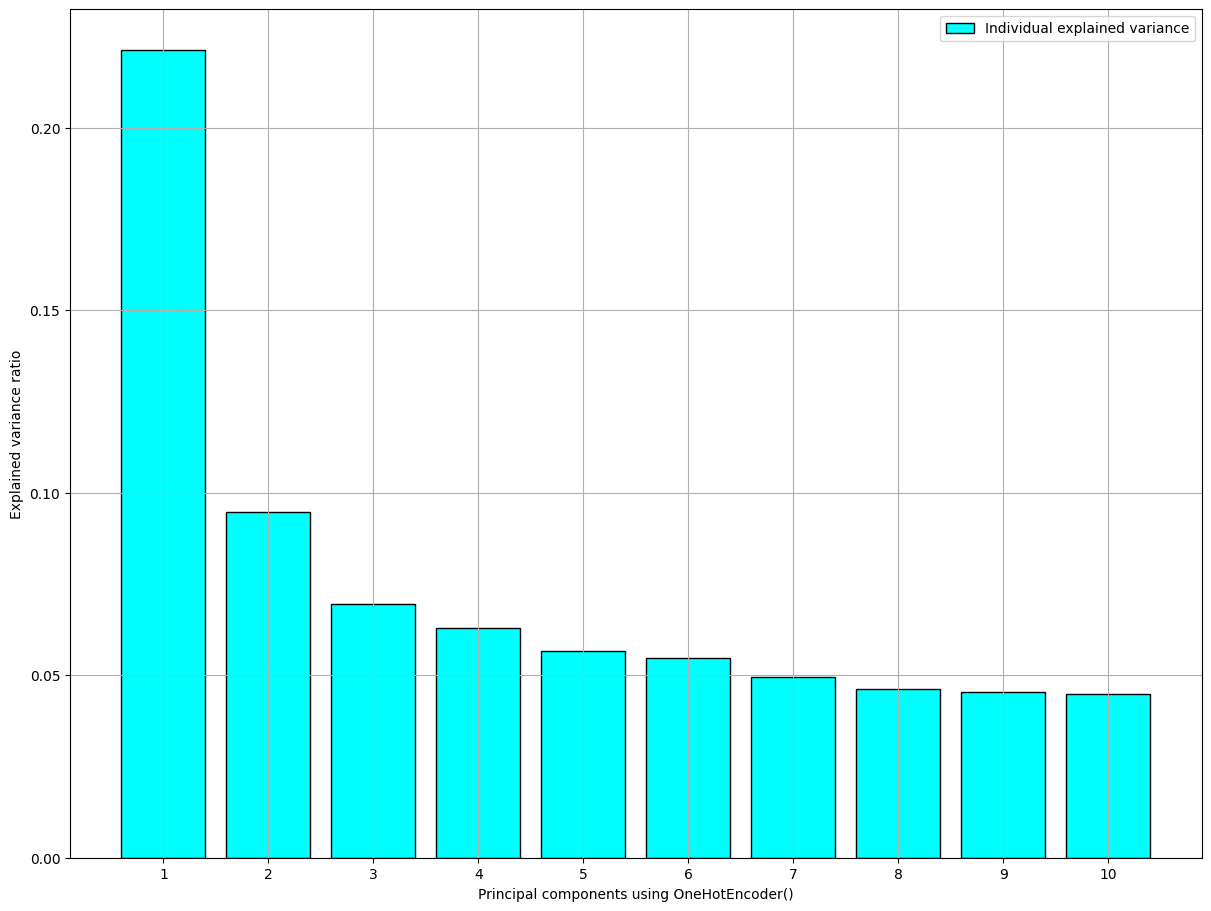

Eigenvectors : 
 [[ 6.21492008e-03  6.68237751e-02  3.04681868e-01  3.00314810e-01
   2.57867397e-01  3.11623818e-01 -2.76888702e-01  1.16377950e-01
   3.49724759e-01  1.29032619e-01 -2.74071702e-01  3.06801112e-01
   1.02154147e-01  2.28258521e-01  1.81860667e-01 -1.50394745e-01
   2.62206510e-01  2.51950693e-01]
 [ 1.07891274e-01  2.32705418e-02 -2.60861025e-01 -6.63639412e-03
  -1.08527515e-01 -2.89216191e-01 -5.47607425e-02 -2.22522974e-01
   2.03320047e-01  5.27800989e-01  7.89036874e-02  1.70846049e-01
   1.84638260e-01  3.56454345e-01  3.44844634e-01  2.94317659e-01
  -1.77599634e-01 -1.35002172e-01]
 [-3.15473055e-01  1.45253238e-01  3.80991702e-01 -4.58931001e-01
  -2.74037252e-01  2.95885968e-01 -2.30220165e-02  1.57759020e-01
   1.61545438e-01 -5.66151892e-04 -5.13607377e-02  1.22047094e-01
  -1.74800700e-02  7.90216522e-04  1.33735272e-01  1.63244819e-01
  -5.28621647e-02 -4.94244694e-01]
 [-3.31029919e-01  6.78162677e-01 -2.26495050e-01  1.36186790e-01
  -1.16854092e-01 -2

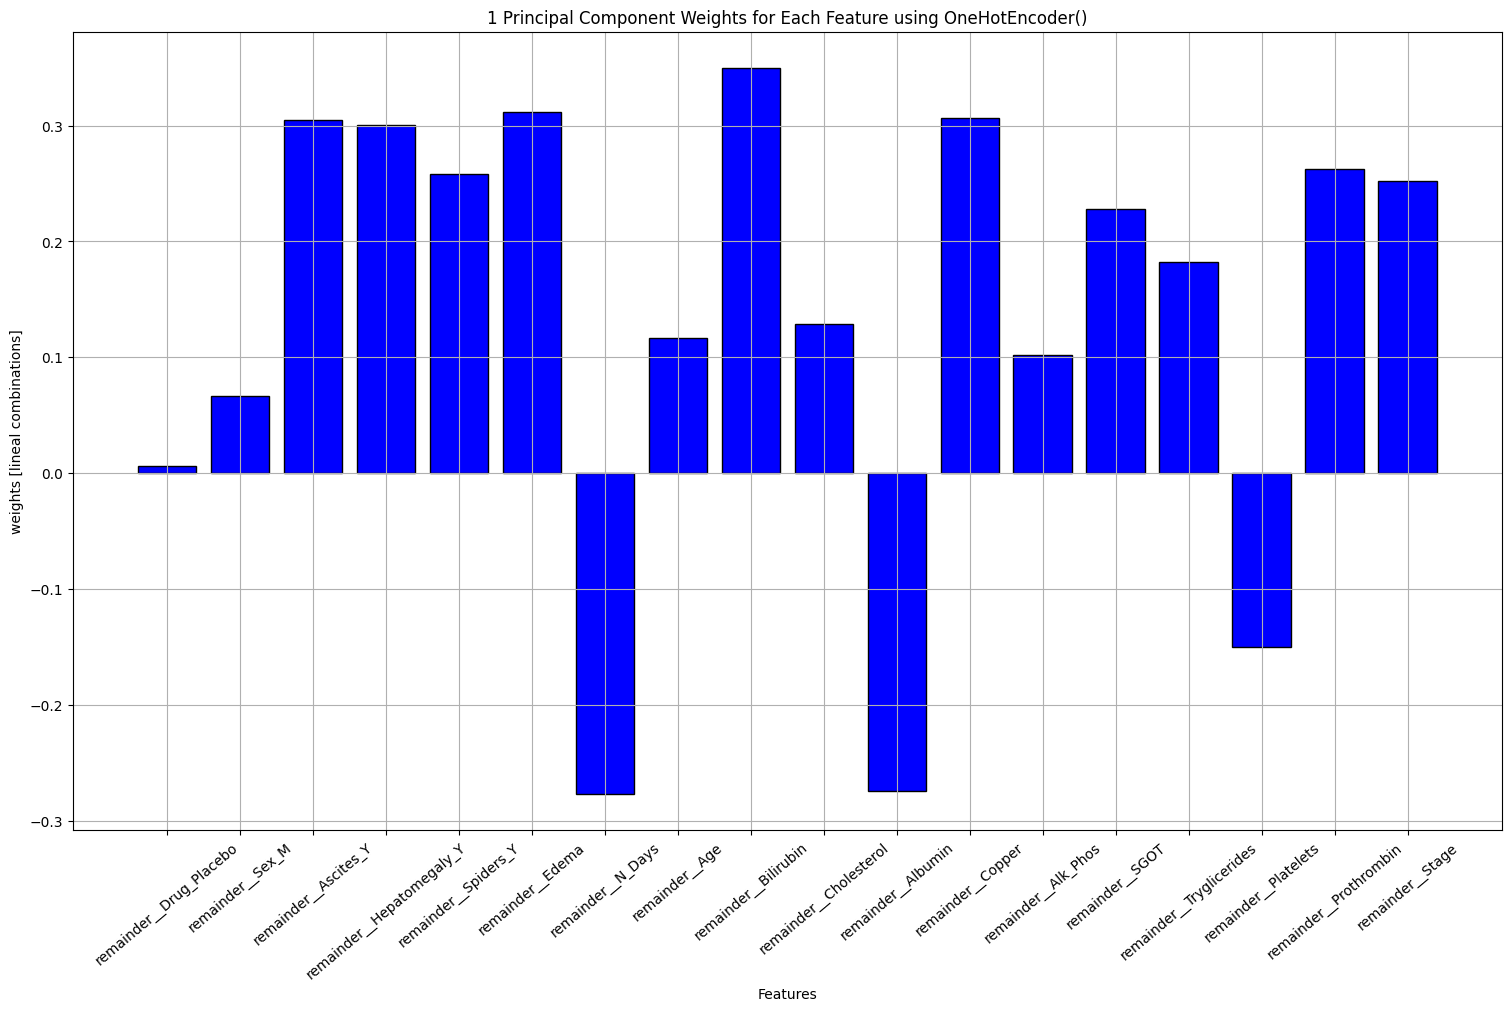

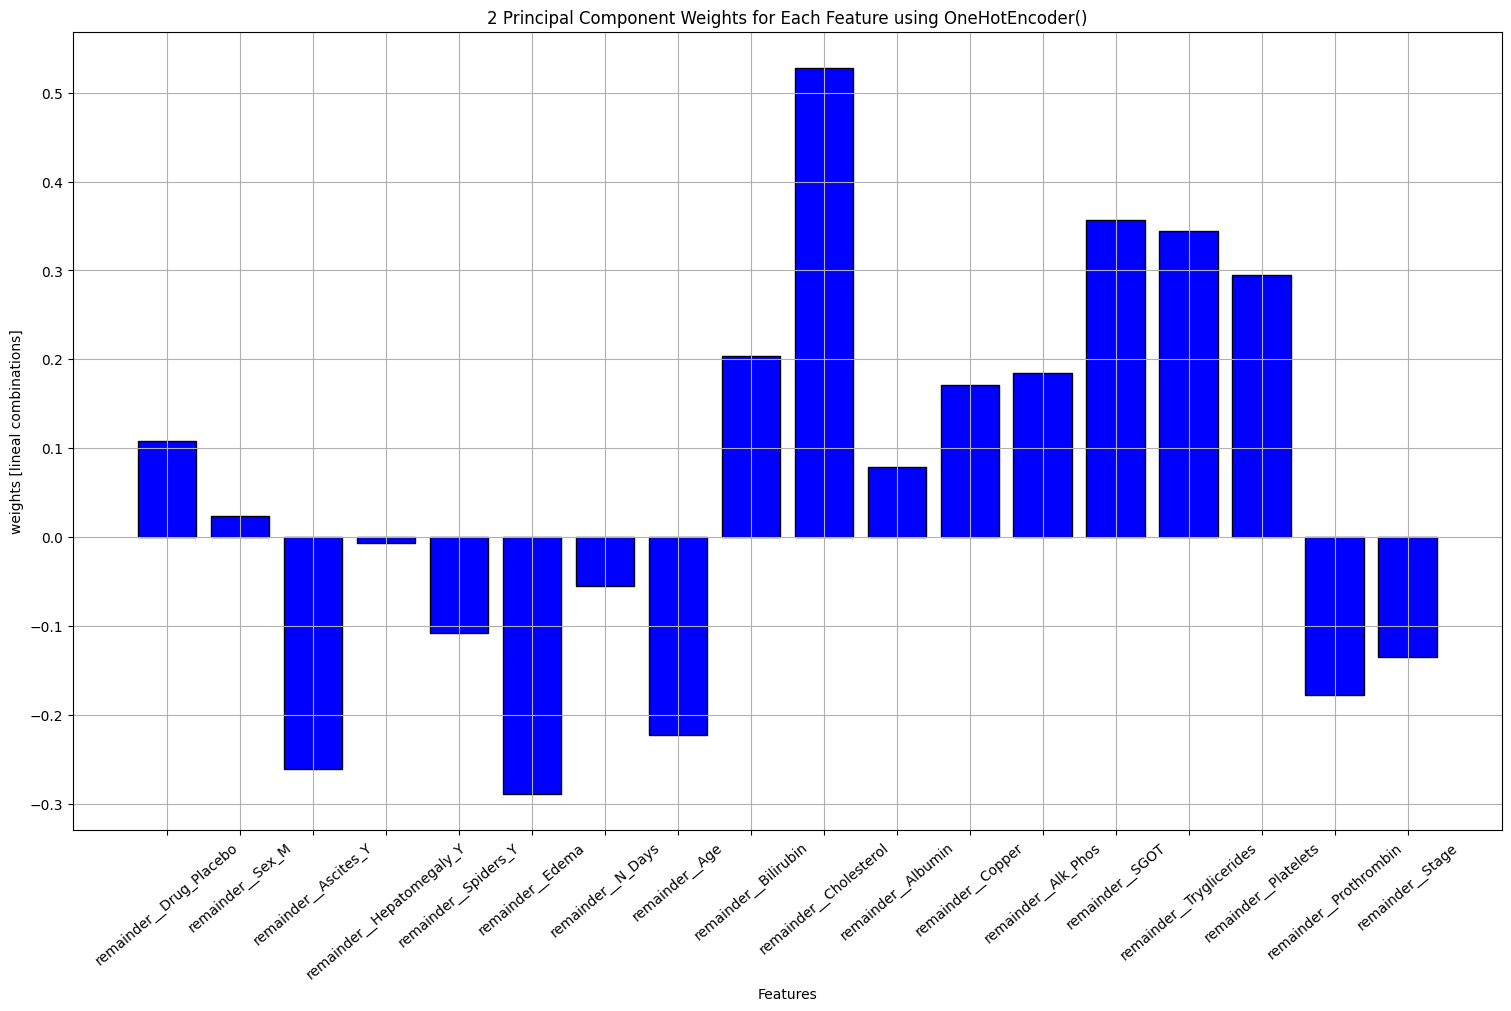

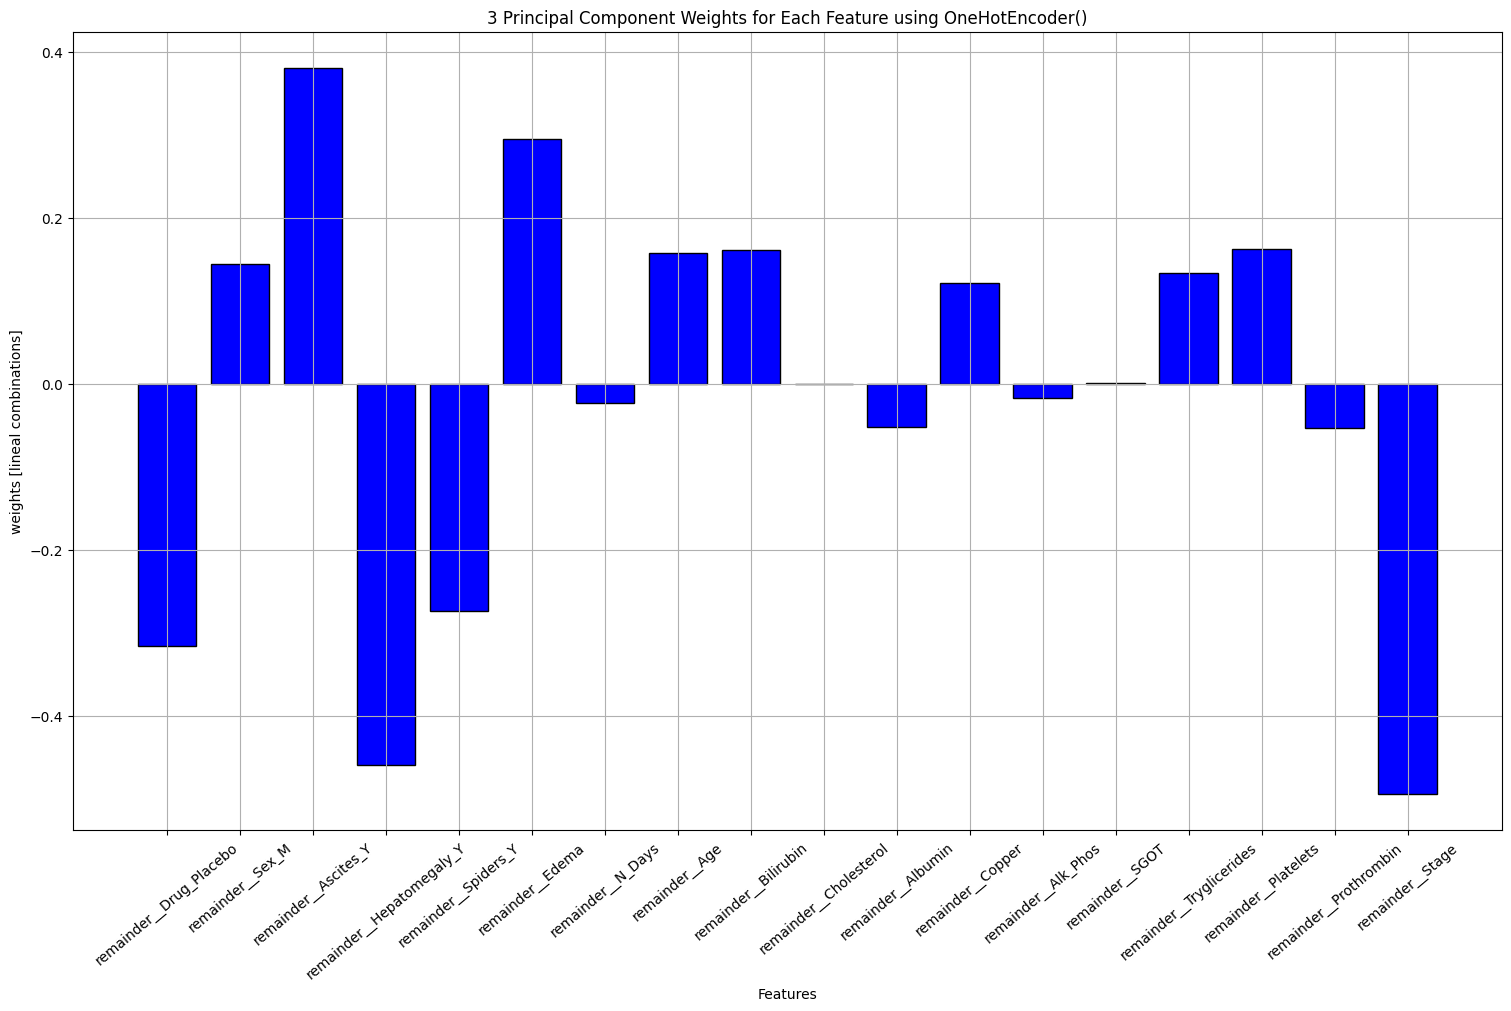

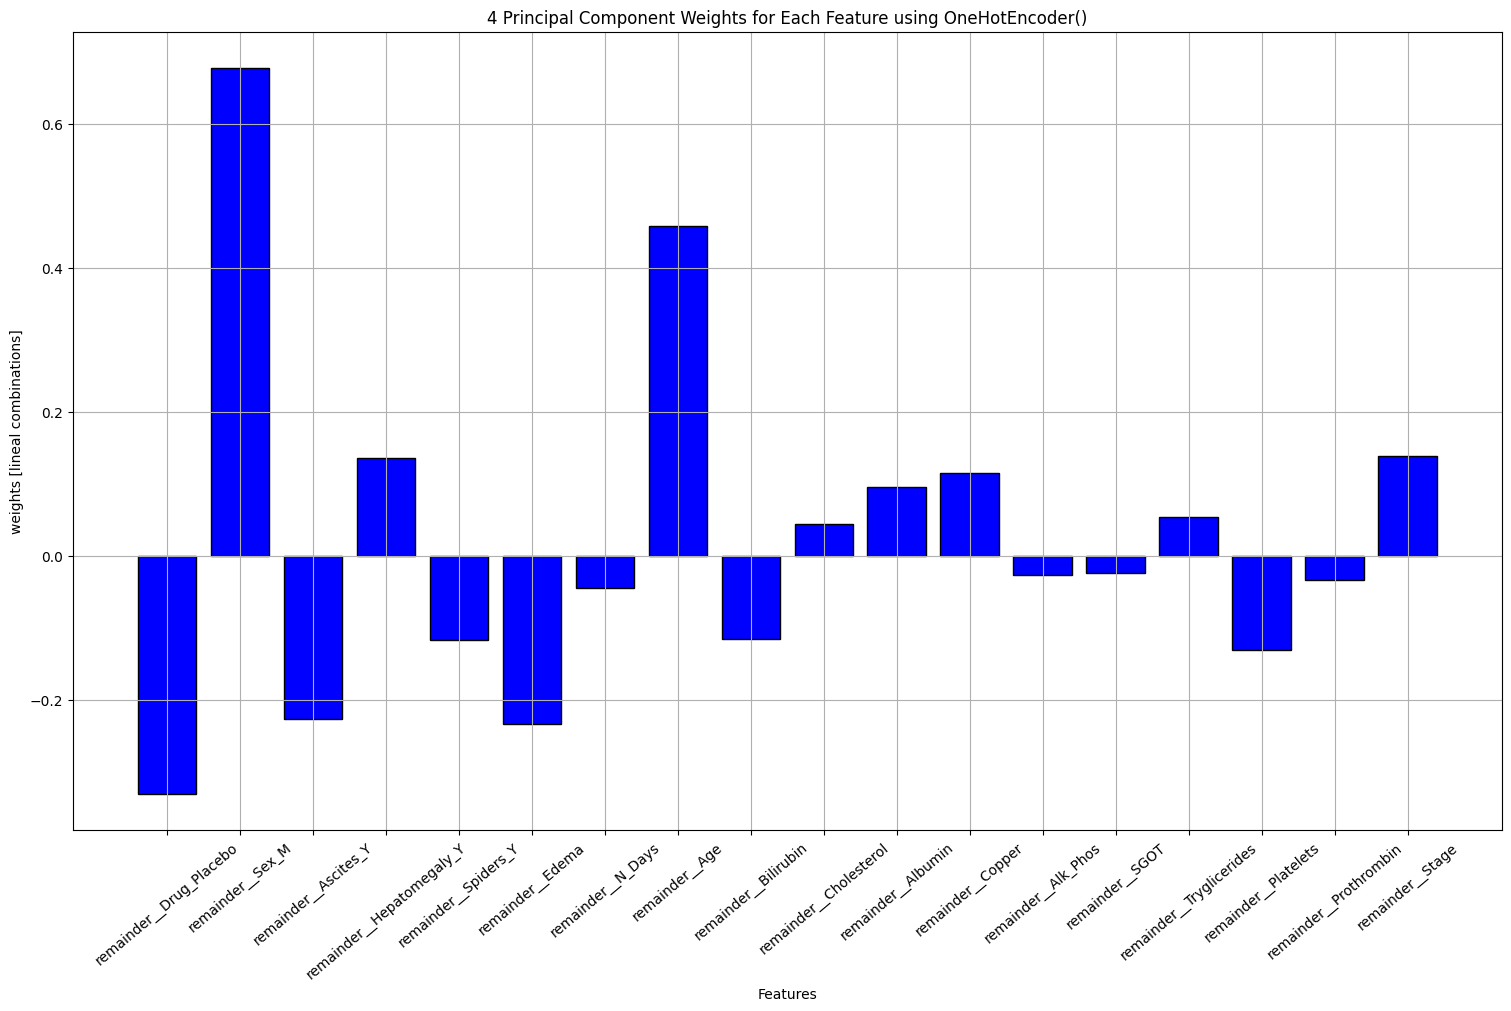

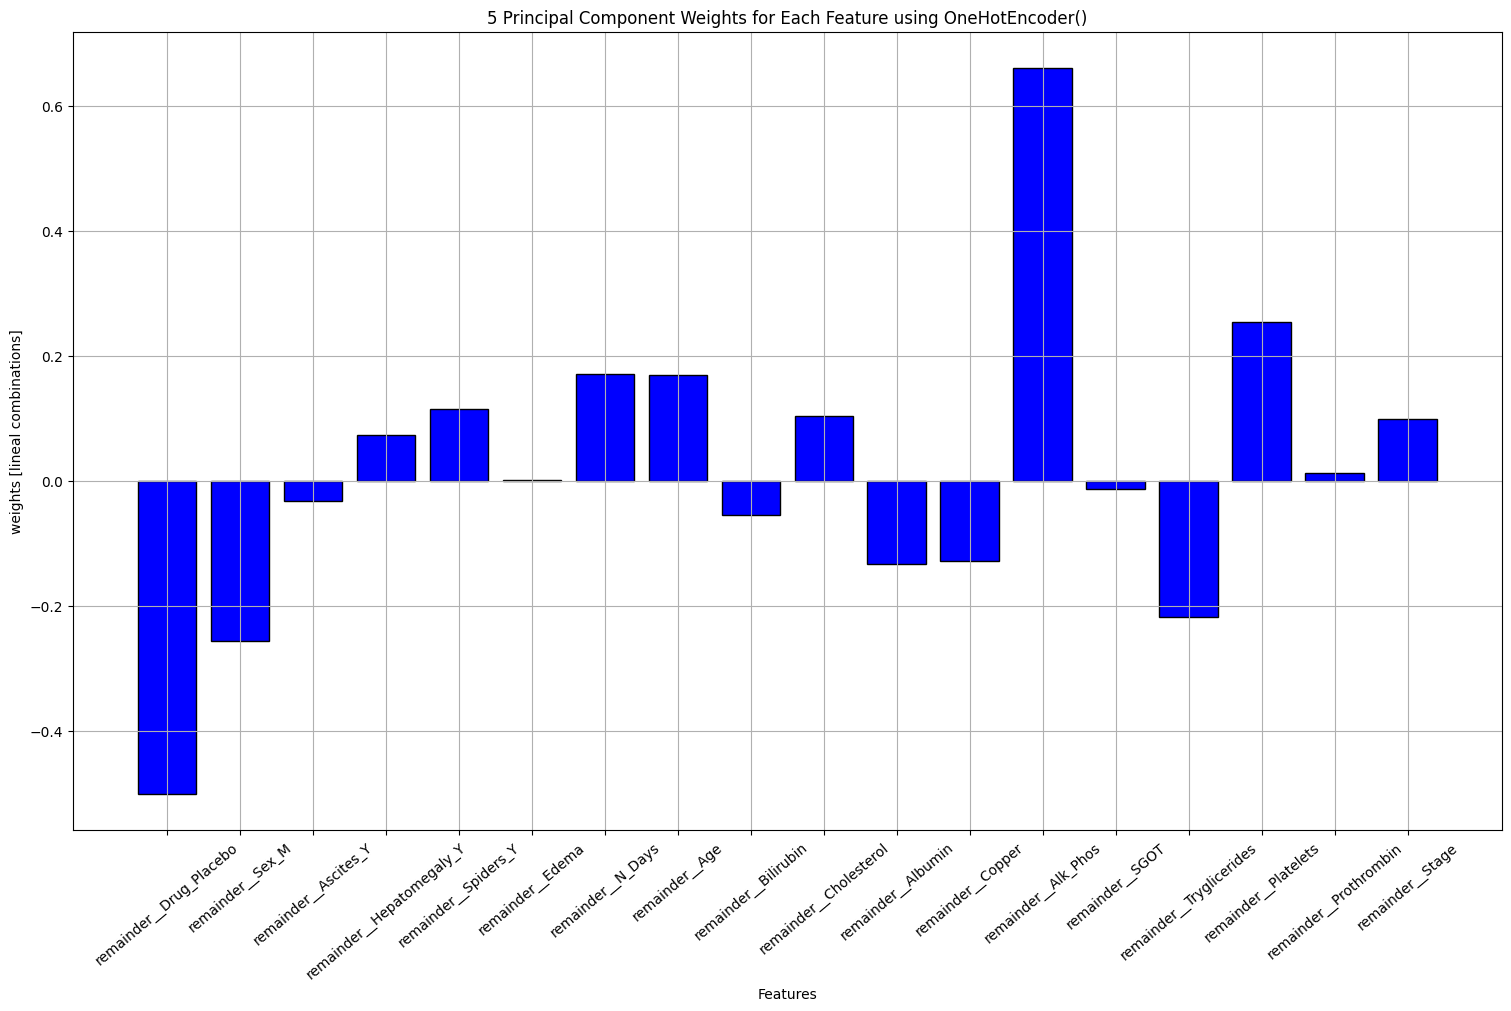

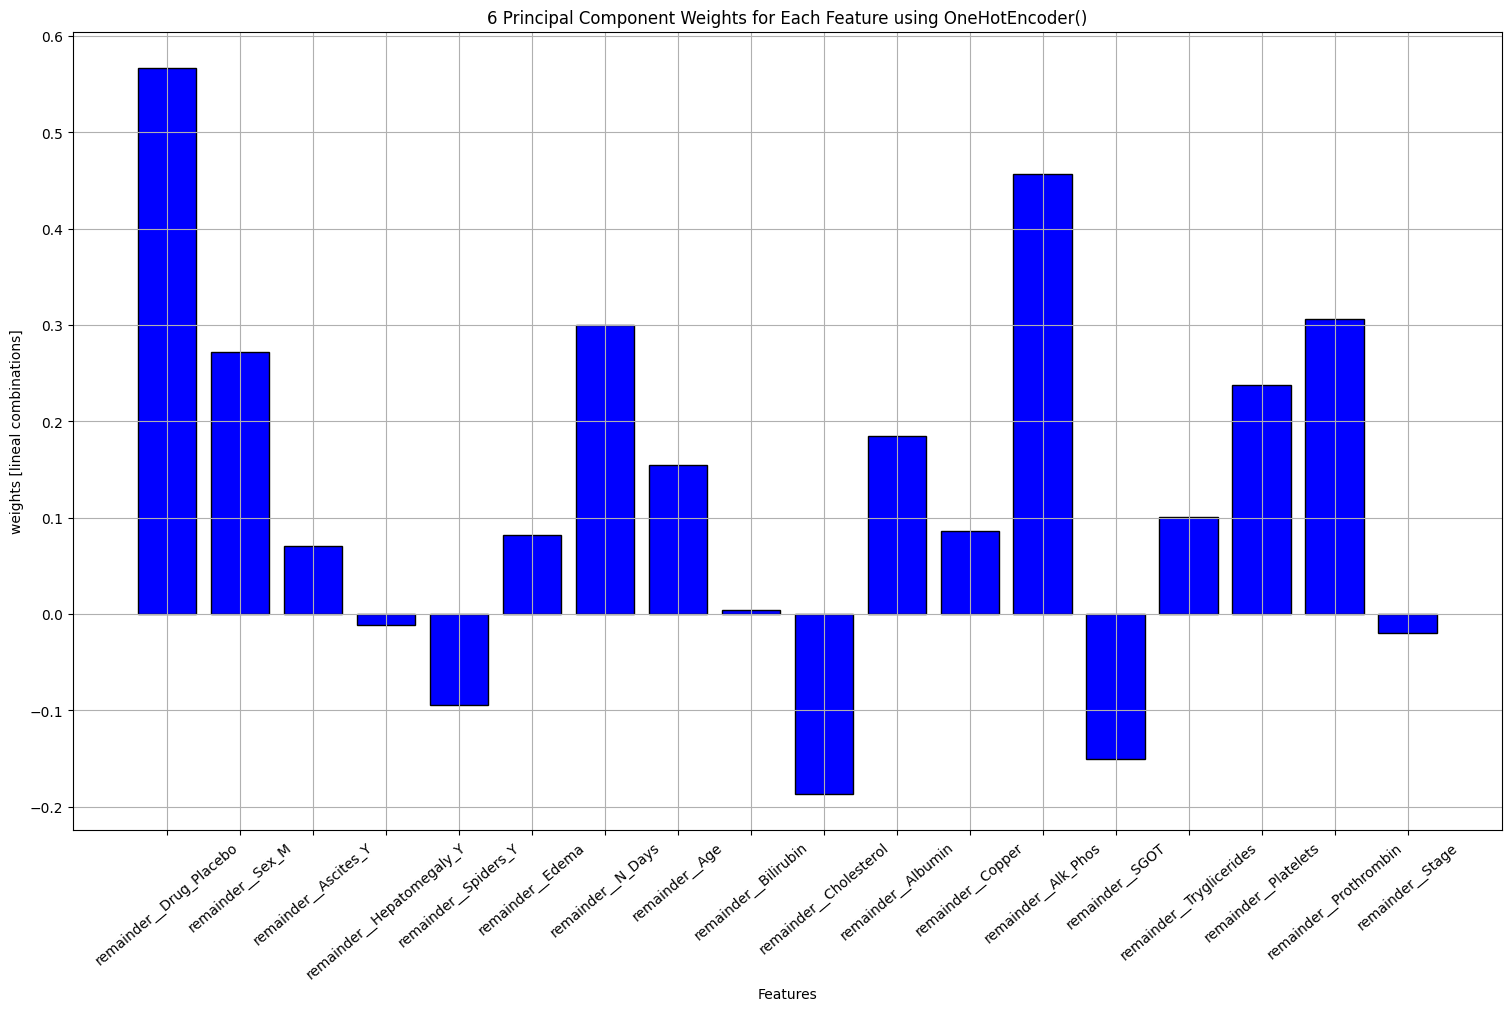

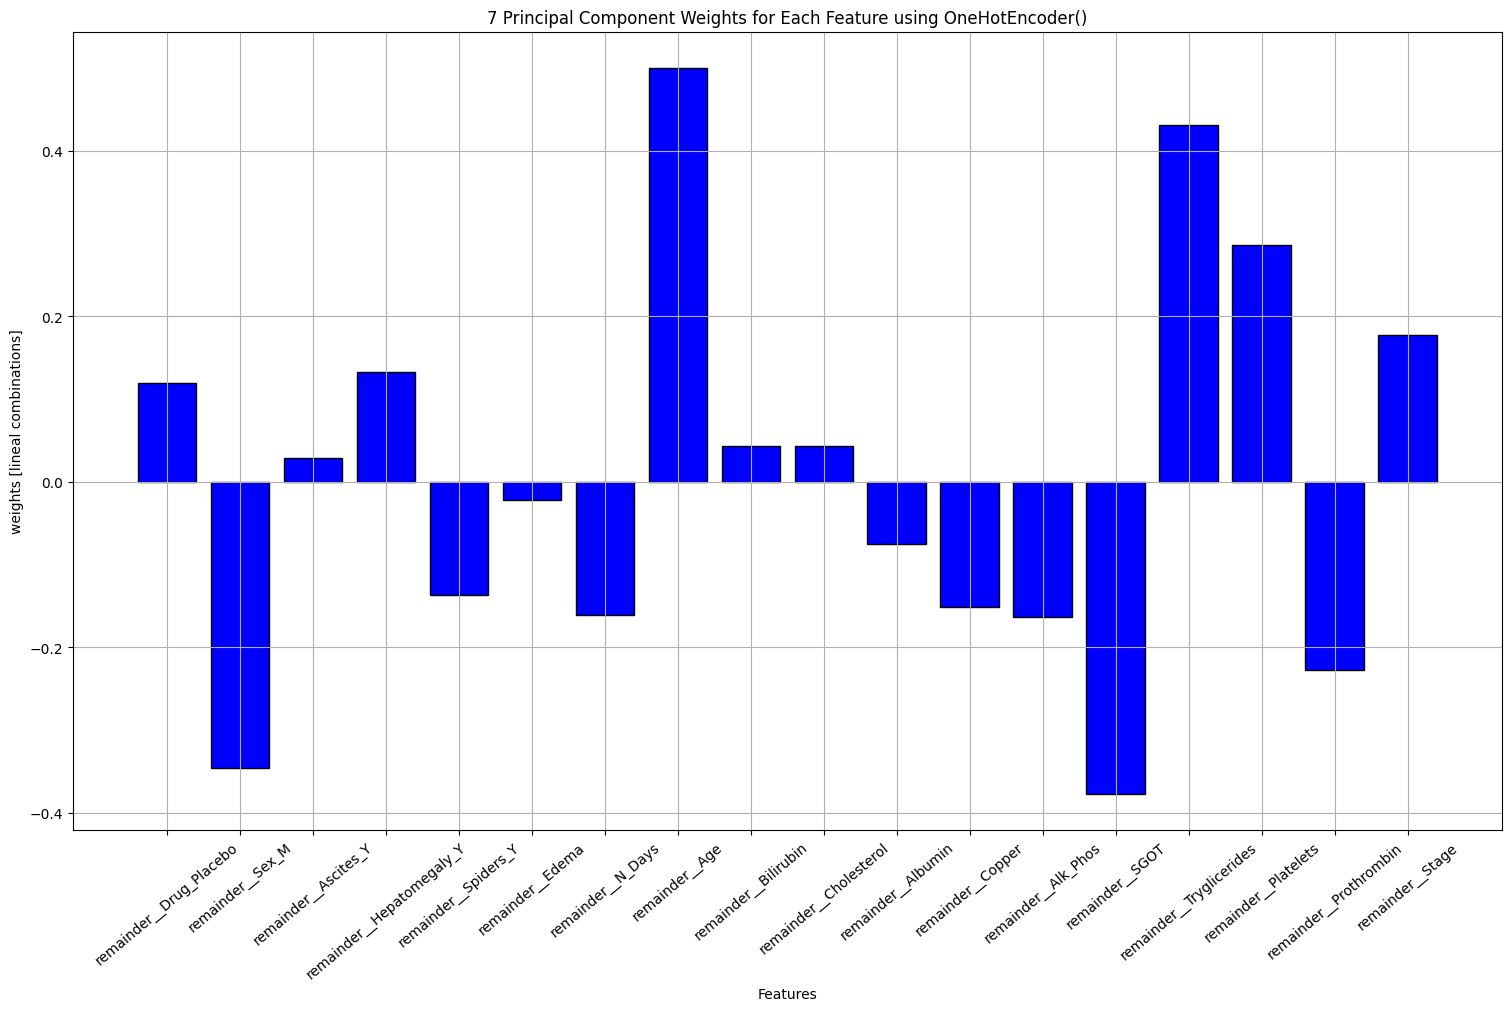

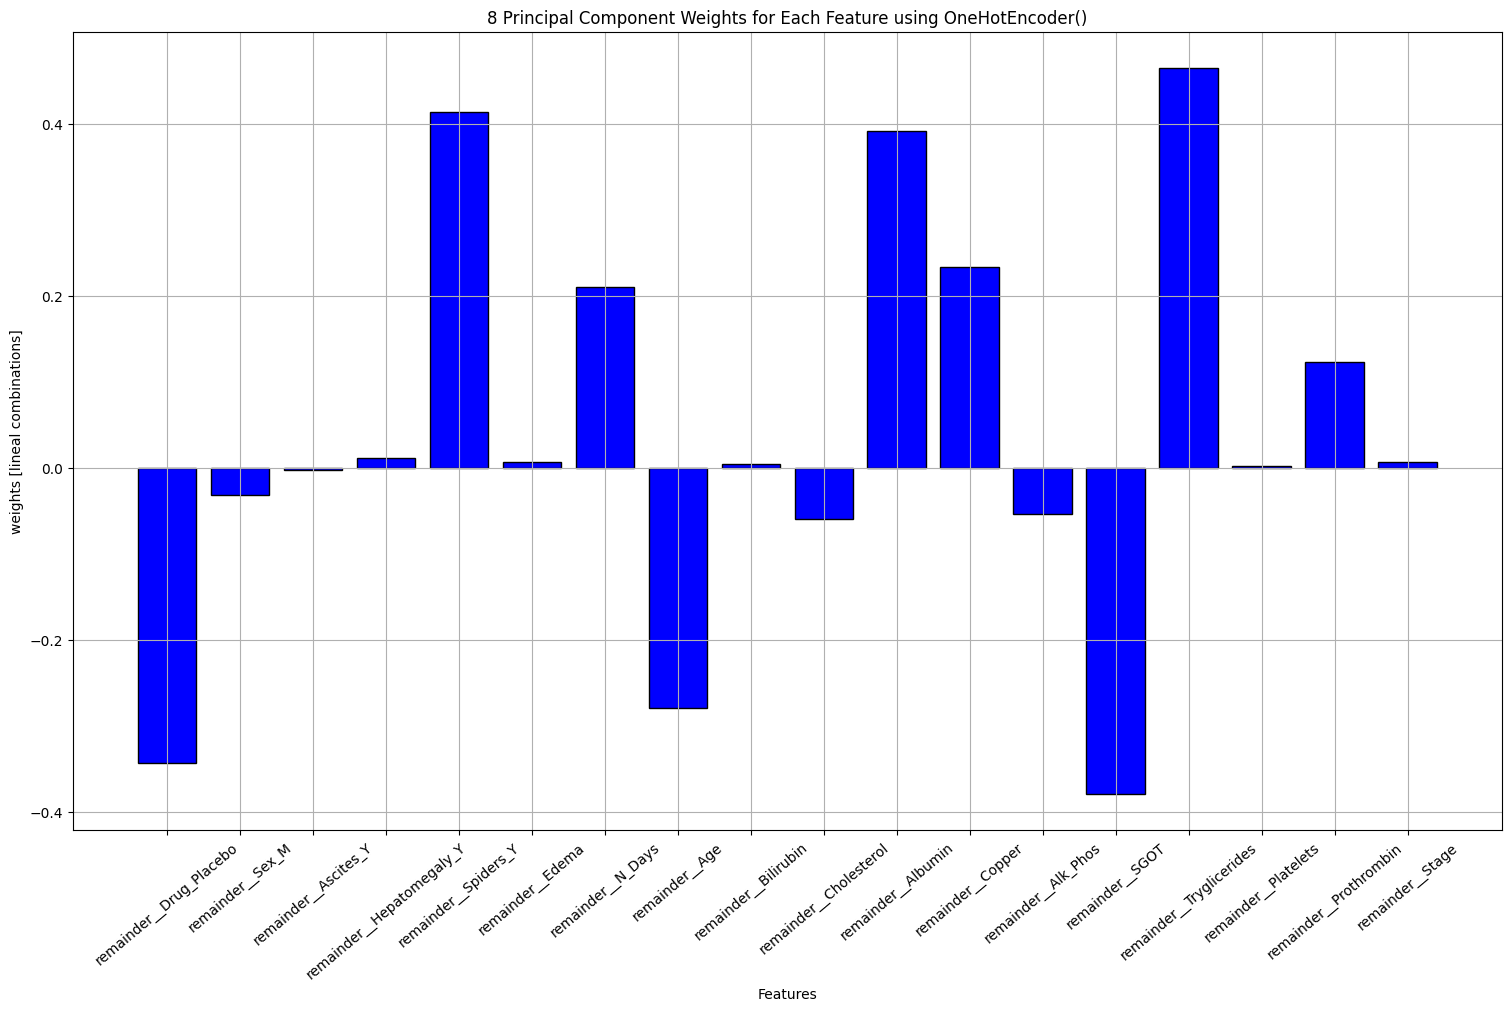

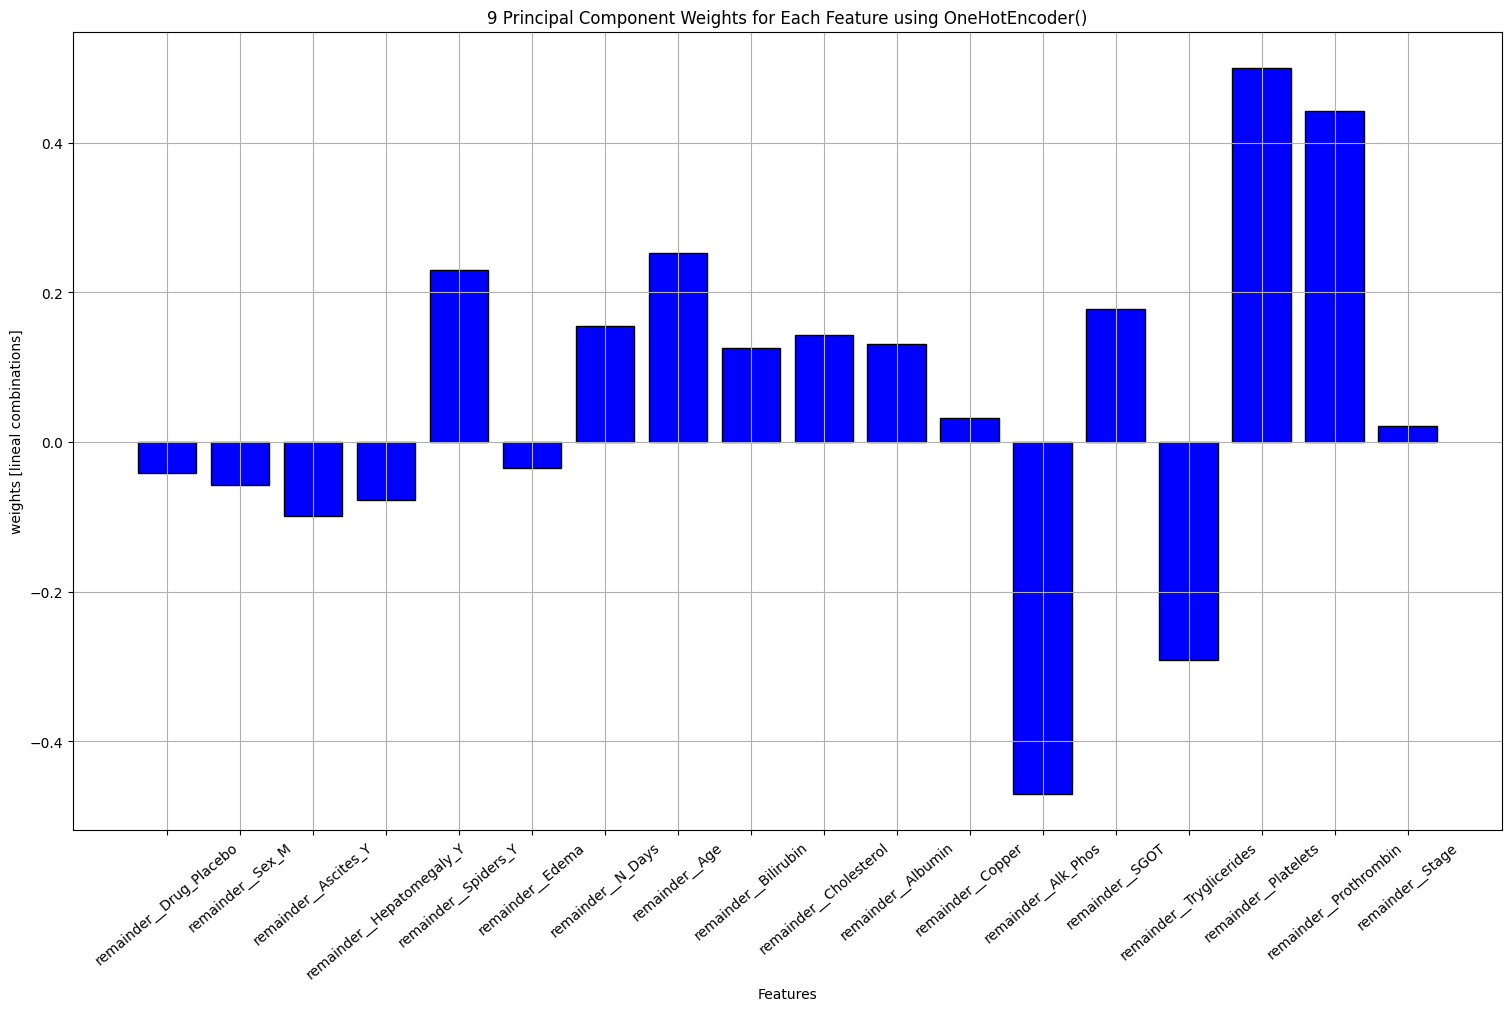

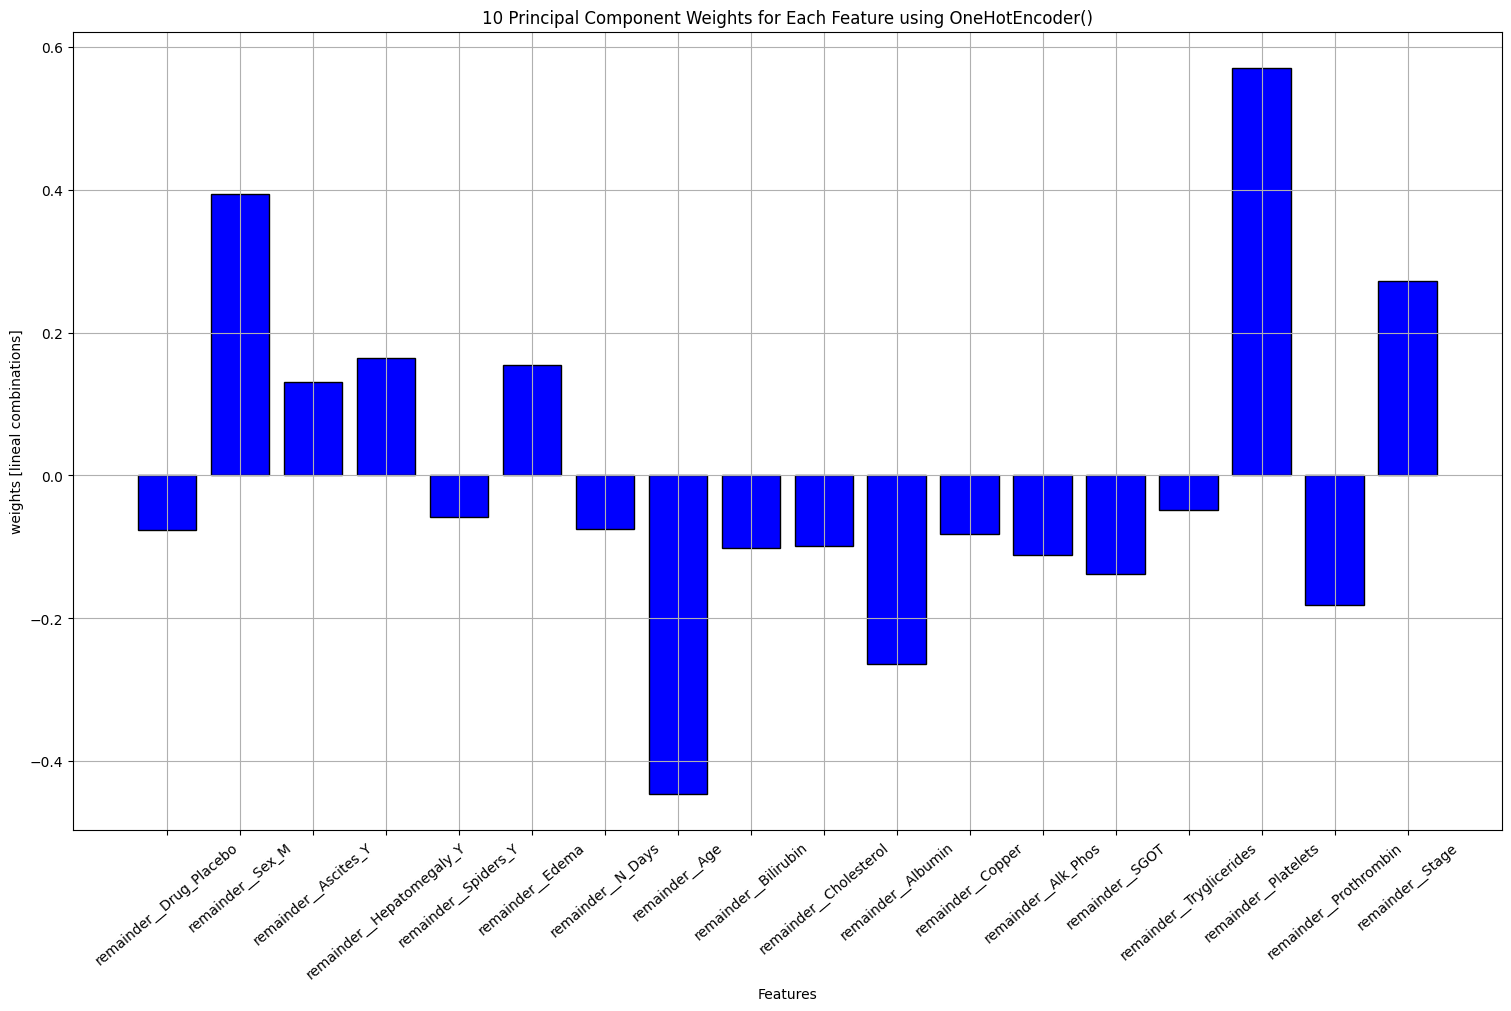

In [74]:
pc_std.study_case
pc_std.plot_variance_retained
pc_std.plot_feature_weights

combinations [(OneHotEncoder(), MinMaxScaler(), 10)]
Columns with NA  []
No NA values in the dataframe
Numero de features tras step ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [])]):  18
Numero de features tras step MinMaxScaler():  18
-----------------------------------------------------------------
Number of PCA components choosen after using OneHotEncoder(): 10
Explained variance ratio: 
 [0.30148379 0.21460606 0.12163141 0.07031853 0.05598484 0.04792982
 0.03728043 0.0296449  0.02534767 0.01967876]
Fraction of original variance (or information) kept by each principal component axis (or image vector) after apllying OneHotEncoder() : 0.924
-----------------------------------------------------------------


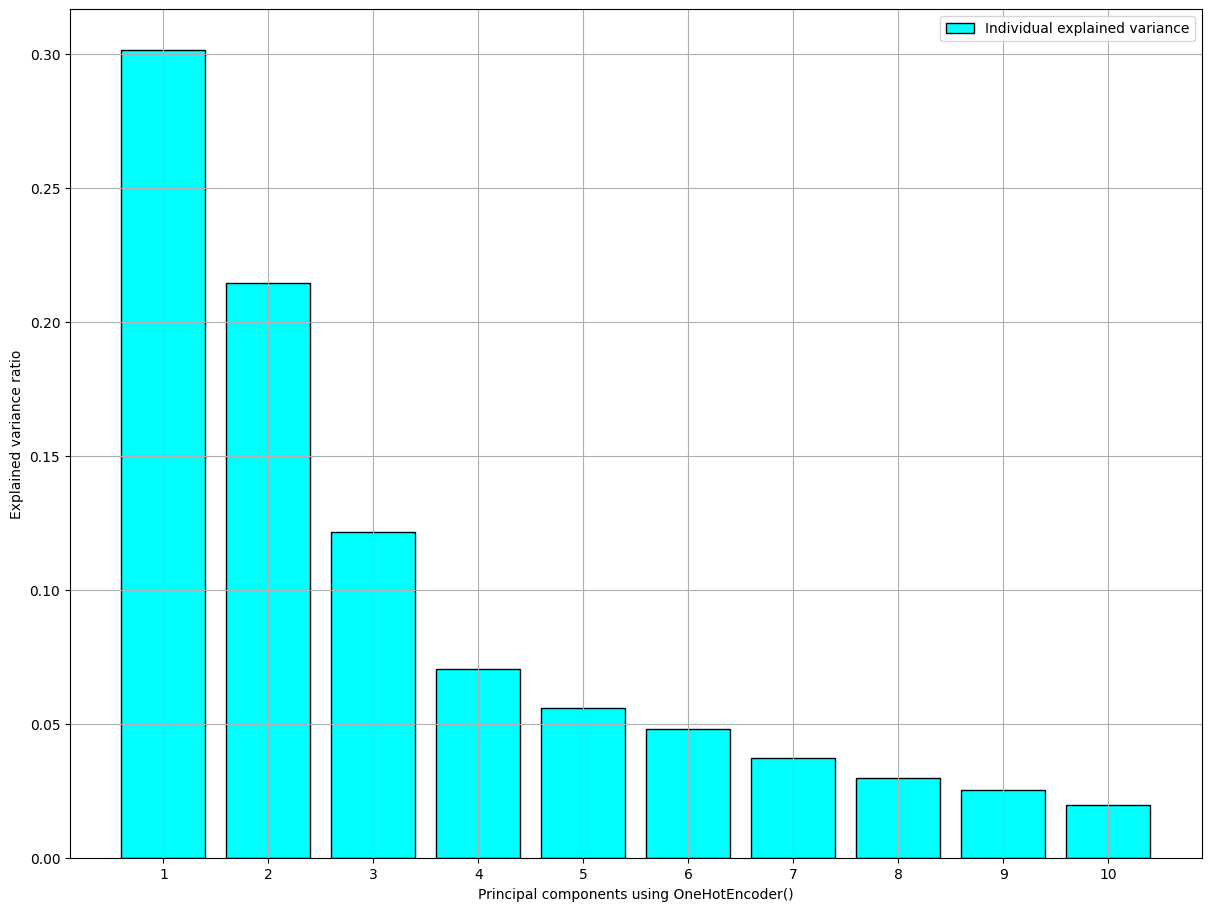

Eigenvectors : 
 [[ 1.11974173e-01  2.72685166e-02  1.21688639e-01  7.54441560e-01
   4.75866280e-01  1.50340463e-01 -1.55464680e-01  4.70319720e-02
   9.70412578e-02  2.64772406e-02 -7.96963737e-02  8.31103267e-02
   3.29373167e-02  5.01000414e-02  3.03397002e-02 -7.72339731e-02
   5.40202489e-02  3.00865810e-01]
 [-9.86595379e-01  3.50453248e-02  5.39317831e-02  2.57381706e-02
   1.13590232e-01  5.49613467e-02 -3.29125917e-02  5.15345691e-02
   8.57761836e-03  4.07983564e-03 -2.40542253e-02  1.60804059e-02
   5.38681402e-03 -1.11816011e-03 -5.98865672e-03 -2.29700314e-02
   4.10668362e-03  2.50943489e-02]
 [ 8.52347977e-02 -9.70310196e-02  7.95741412e-02 -5.29017983e-01
   8.20032557e-01  1.02579281e-01 -1.08117411e-02 -2.08704623e-02
   2.55009674e-02 -2.13952318e-02 -1.60914719e-02  2.41464499e-02
  -8.49841683e-03  1.18616452e-03 -6.04164152e-03 -1.52109350e-02
   2.47065711e-02 -1.03429236e-01]
 [ 6.53044846e-02  2.87227633e-01  5.24774264e-01 -2.32080921e-01
  -2.48732988e-01  5

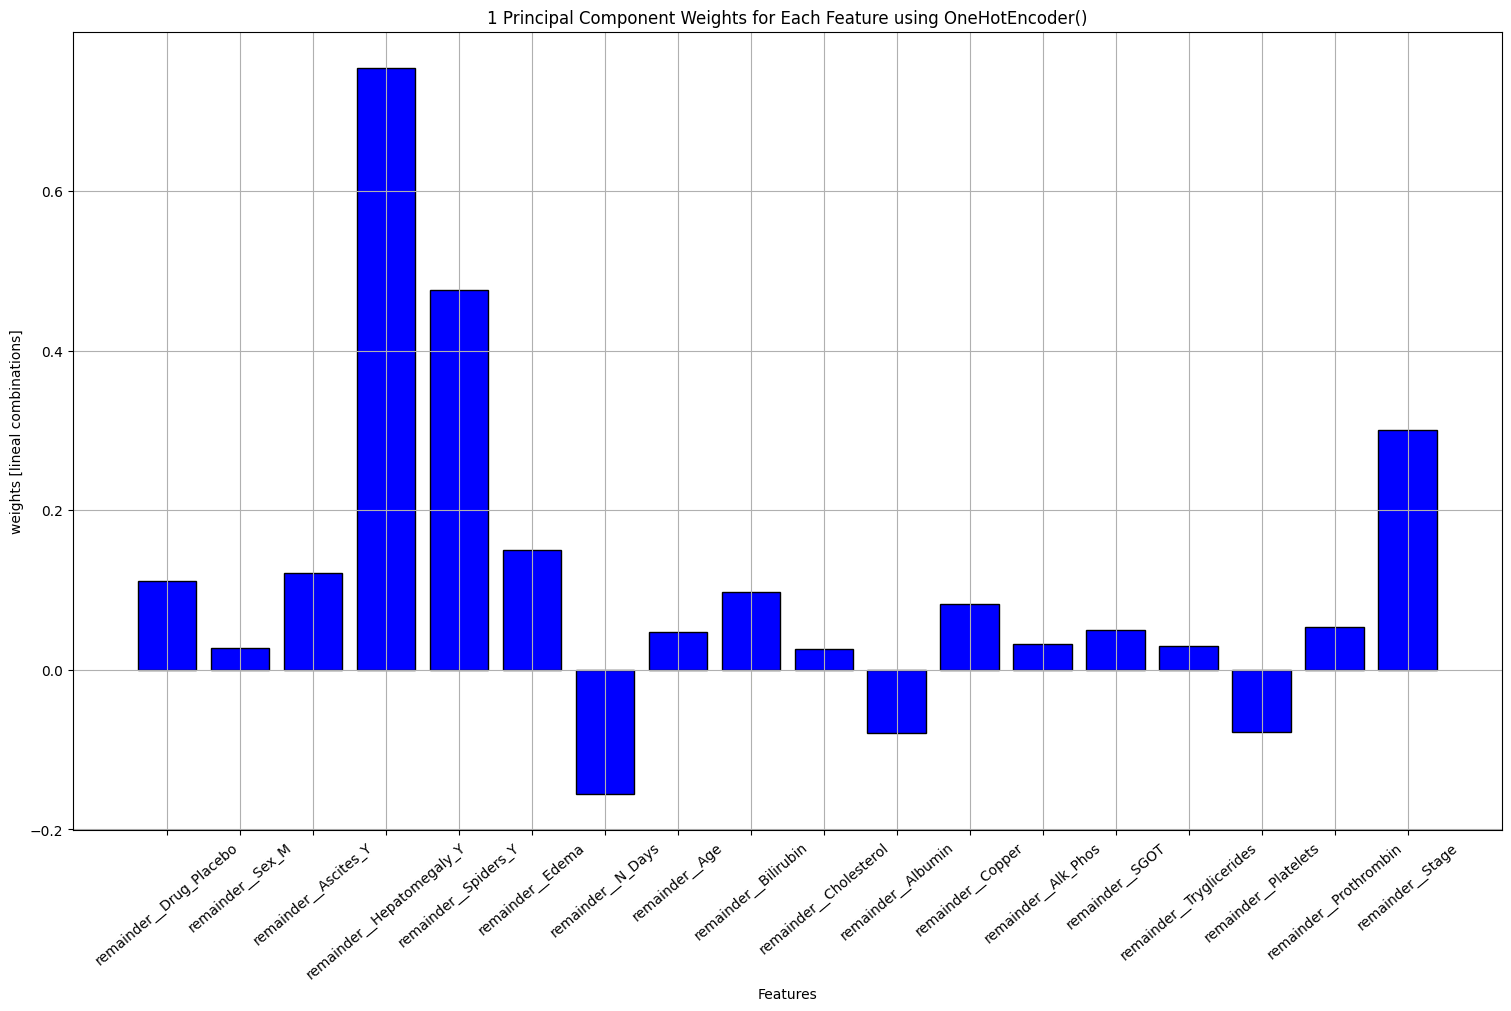

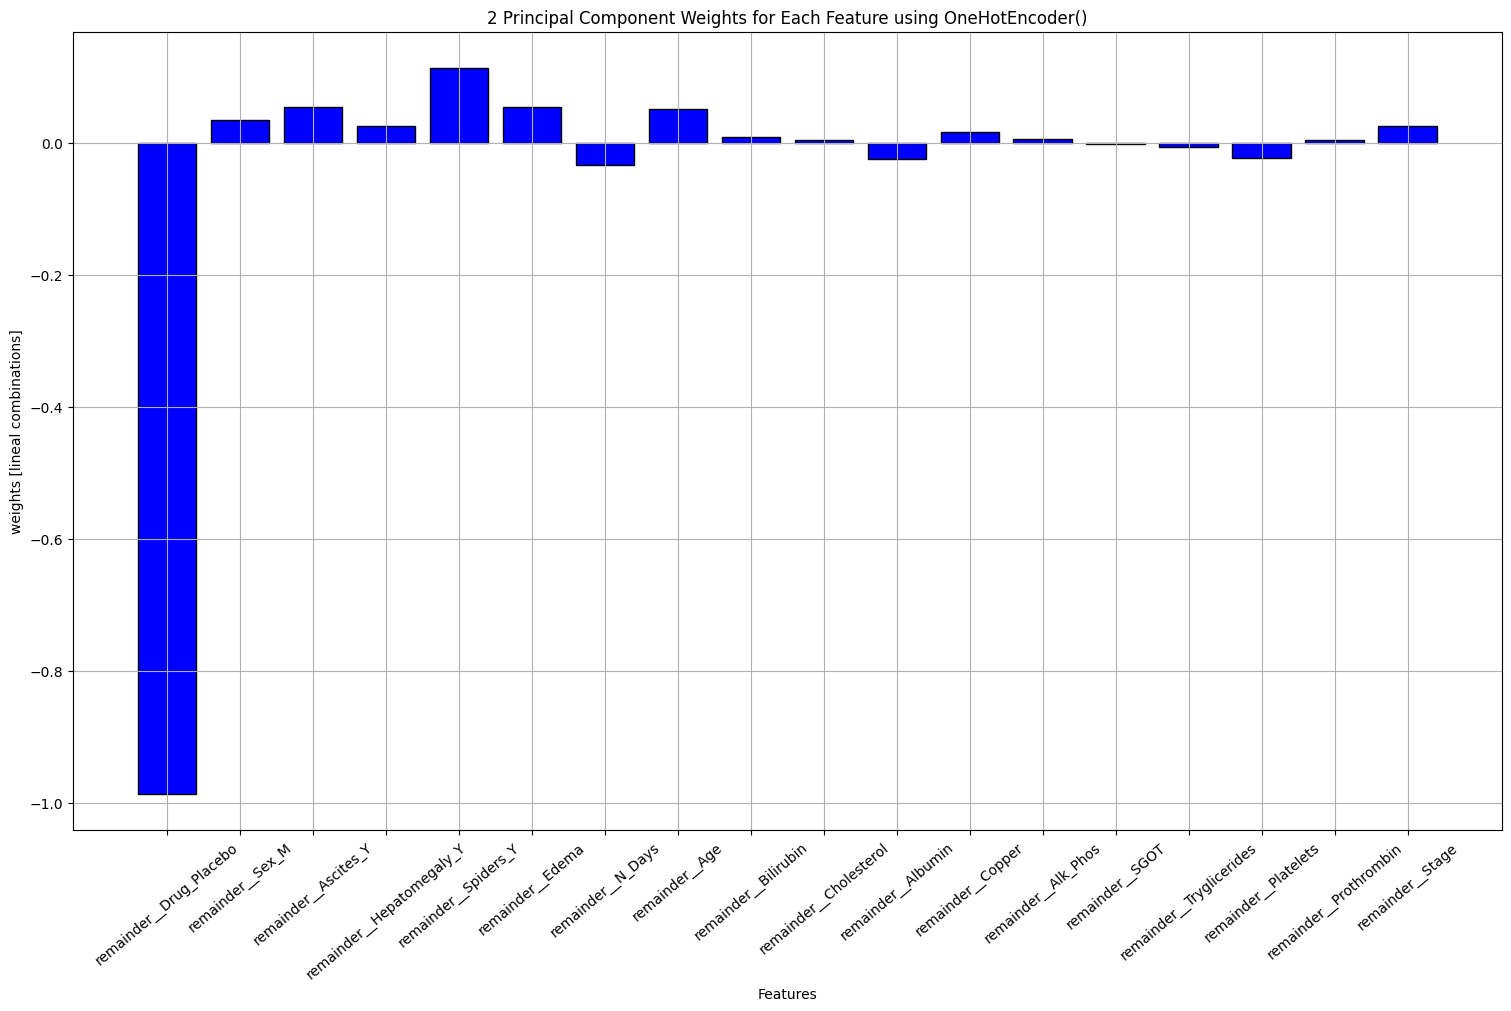

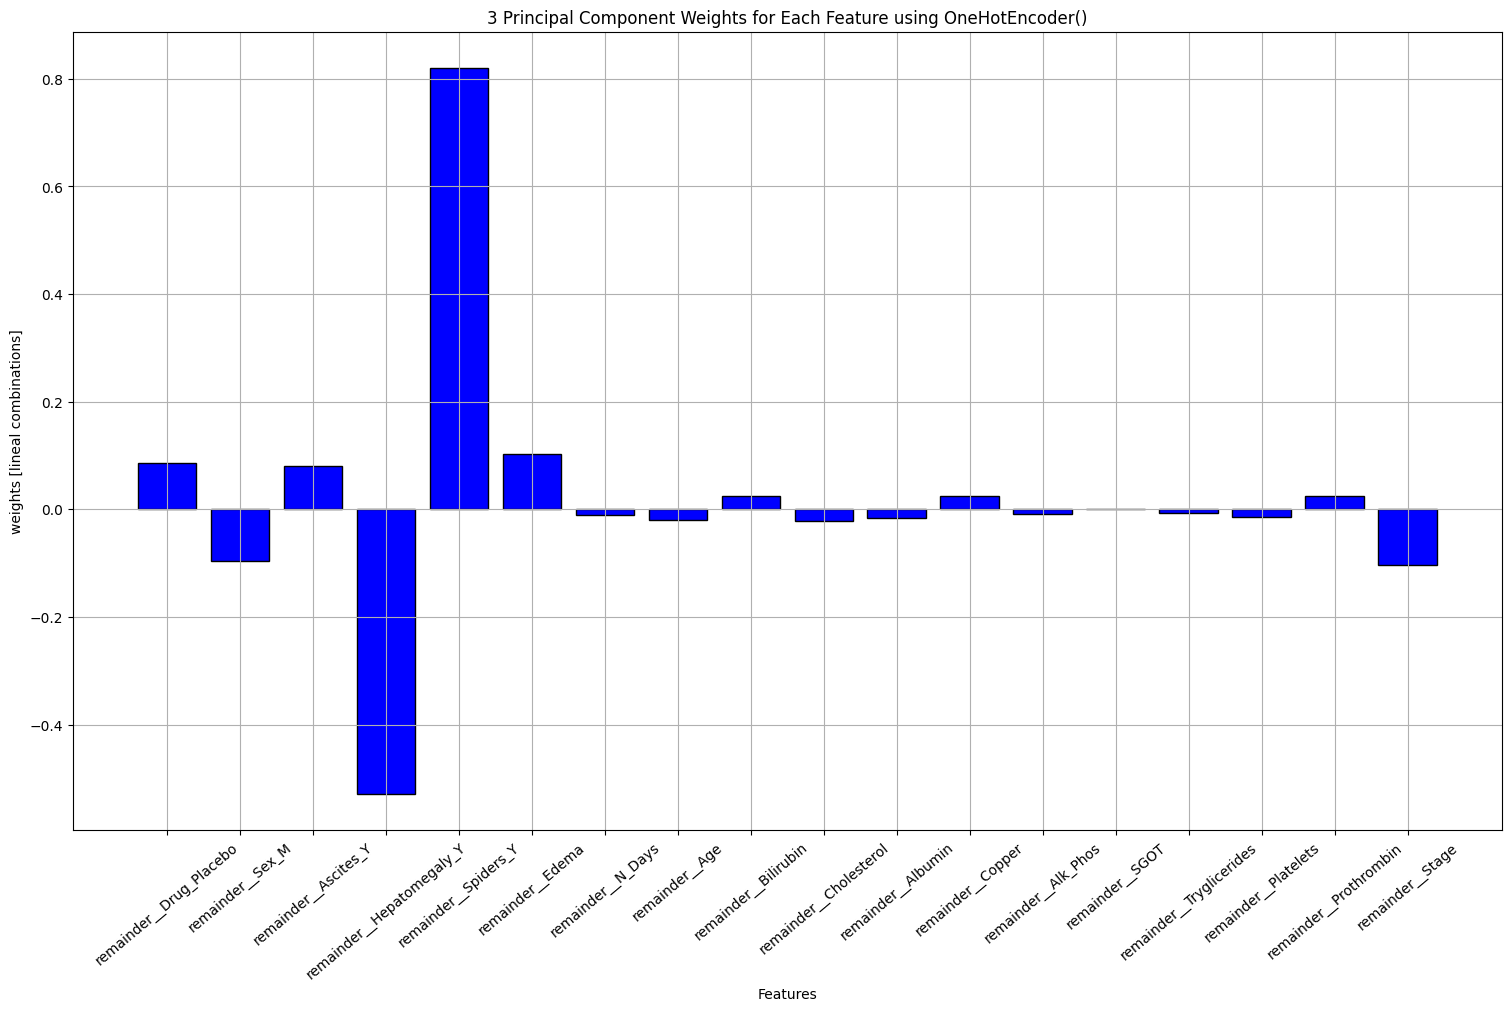

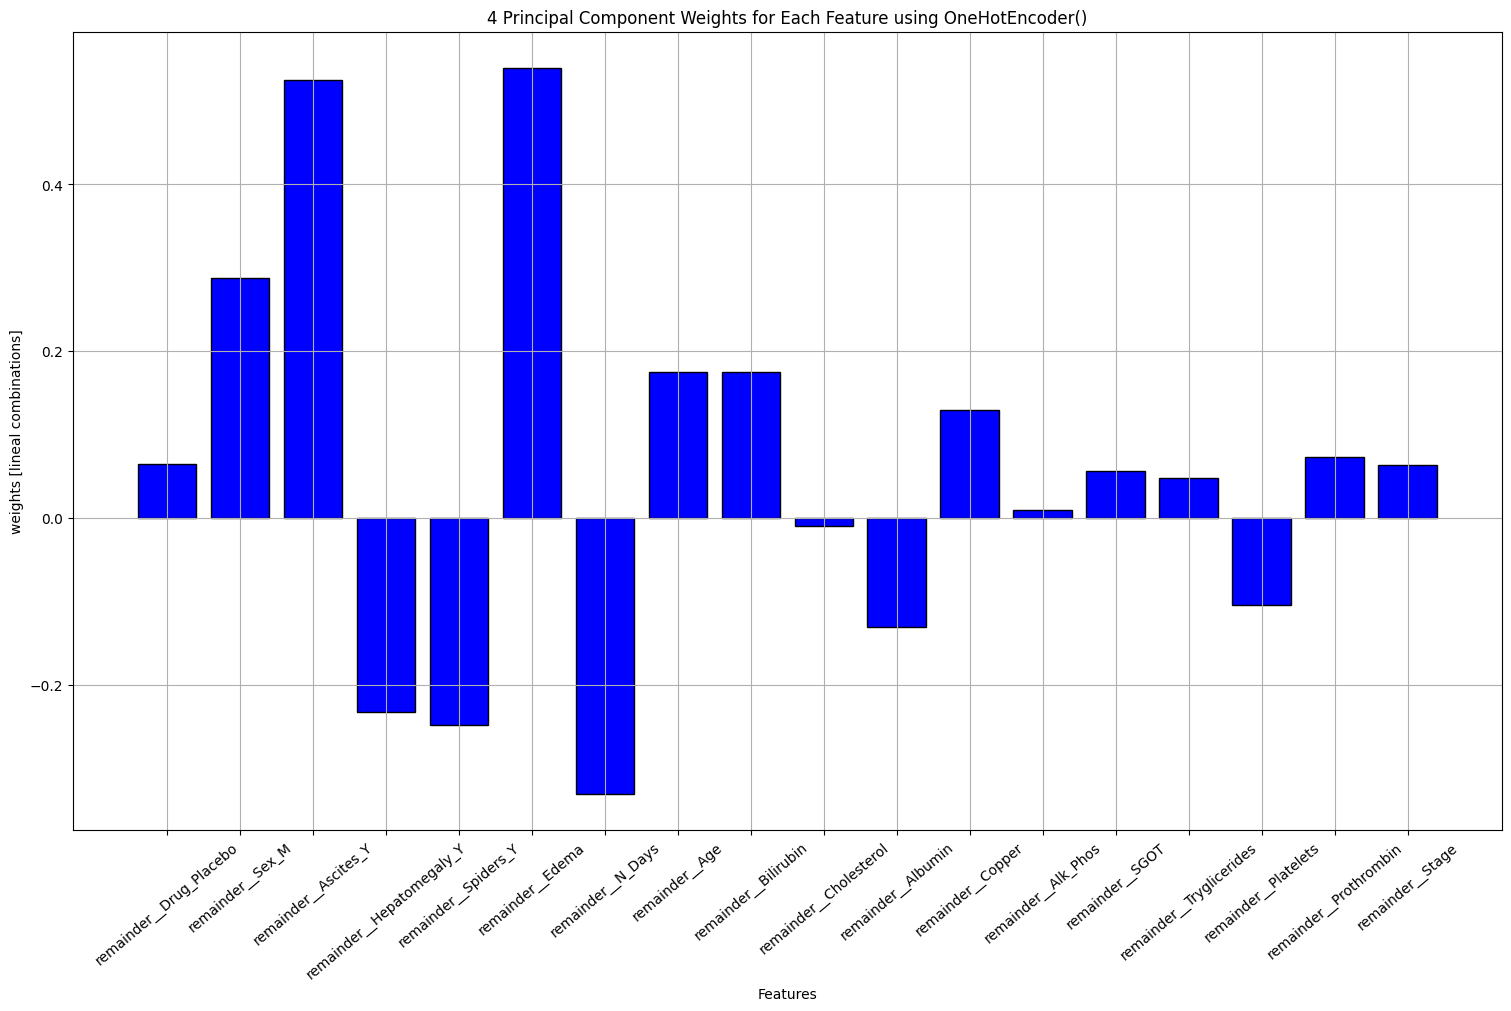

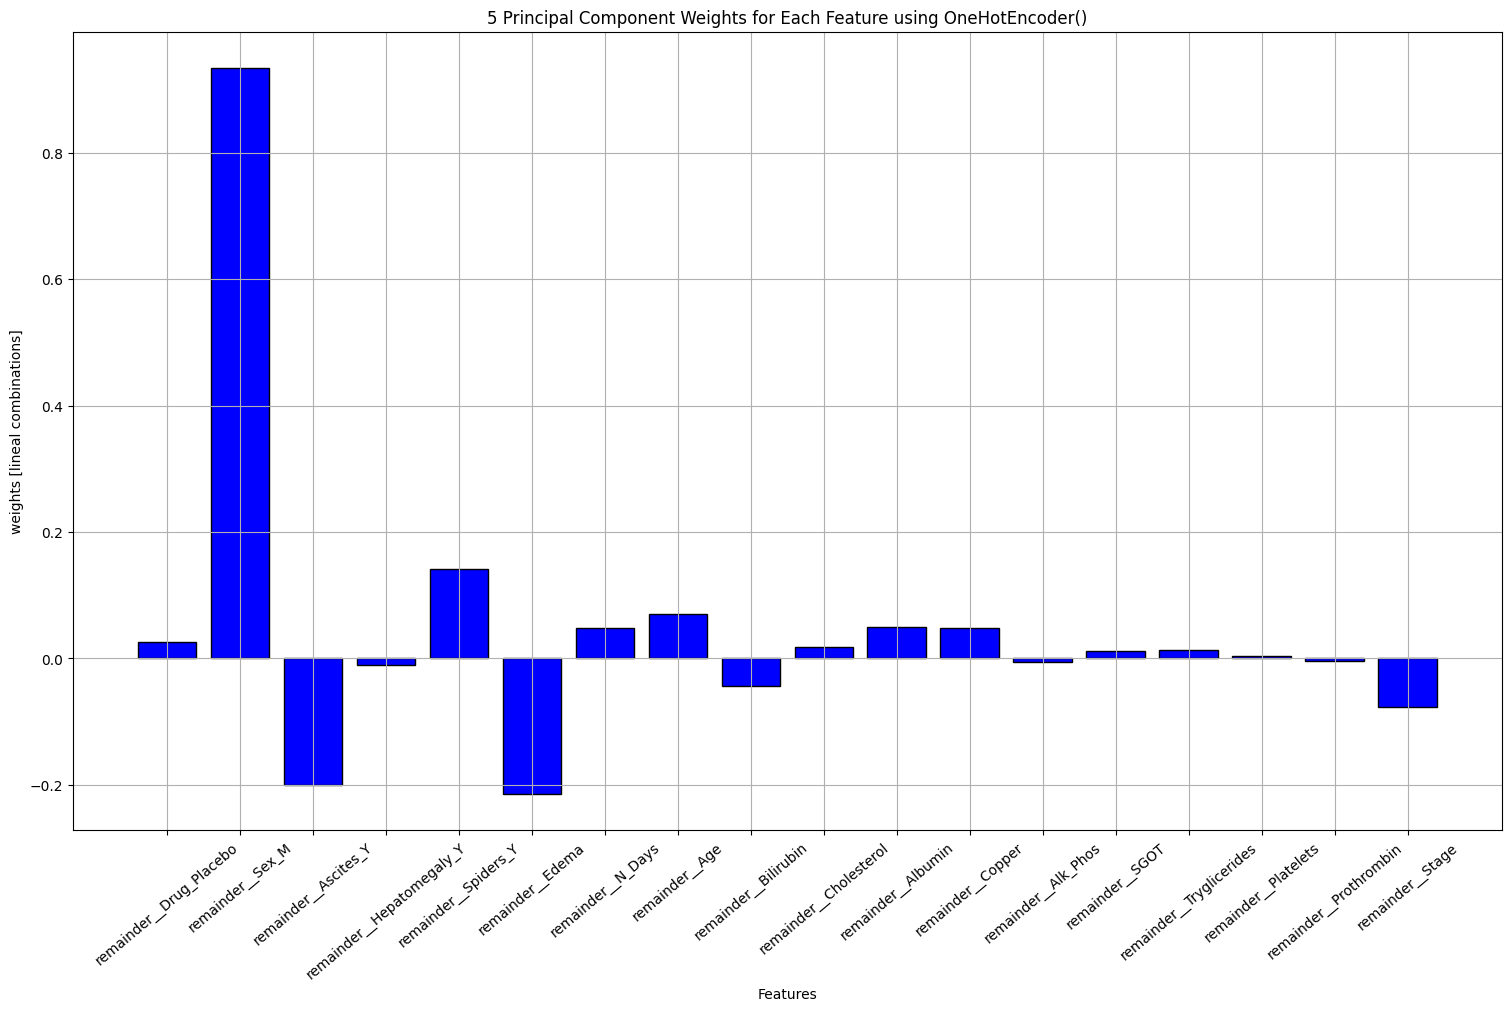

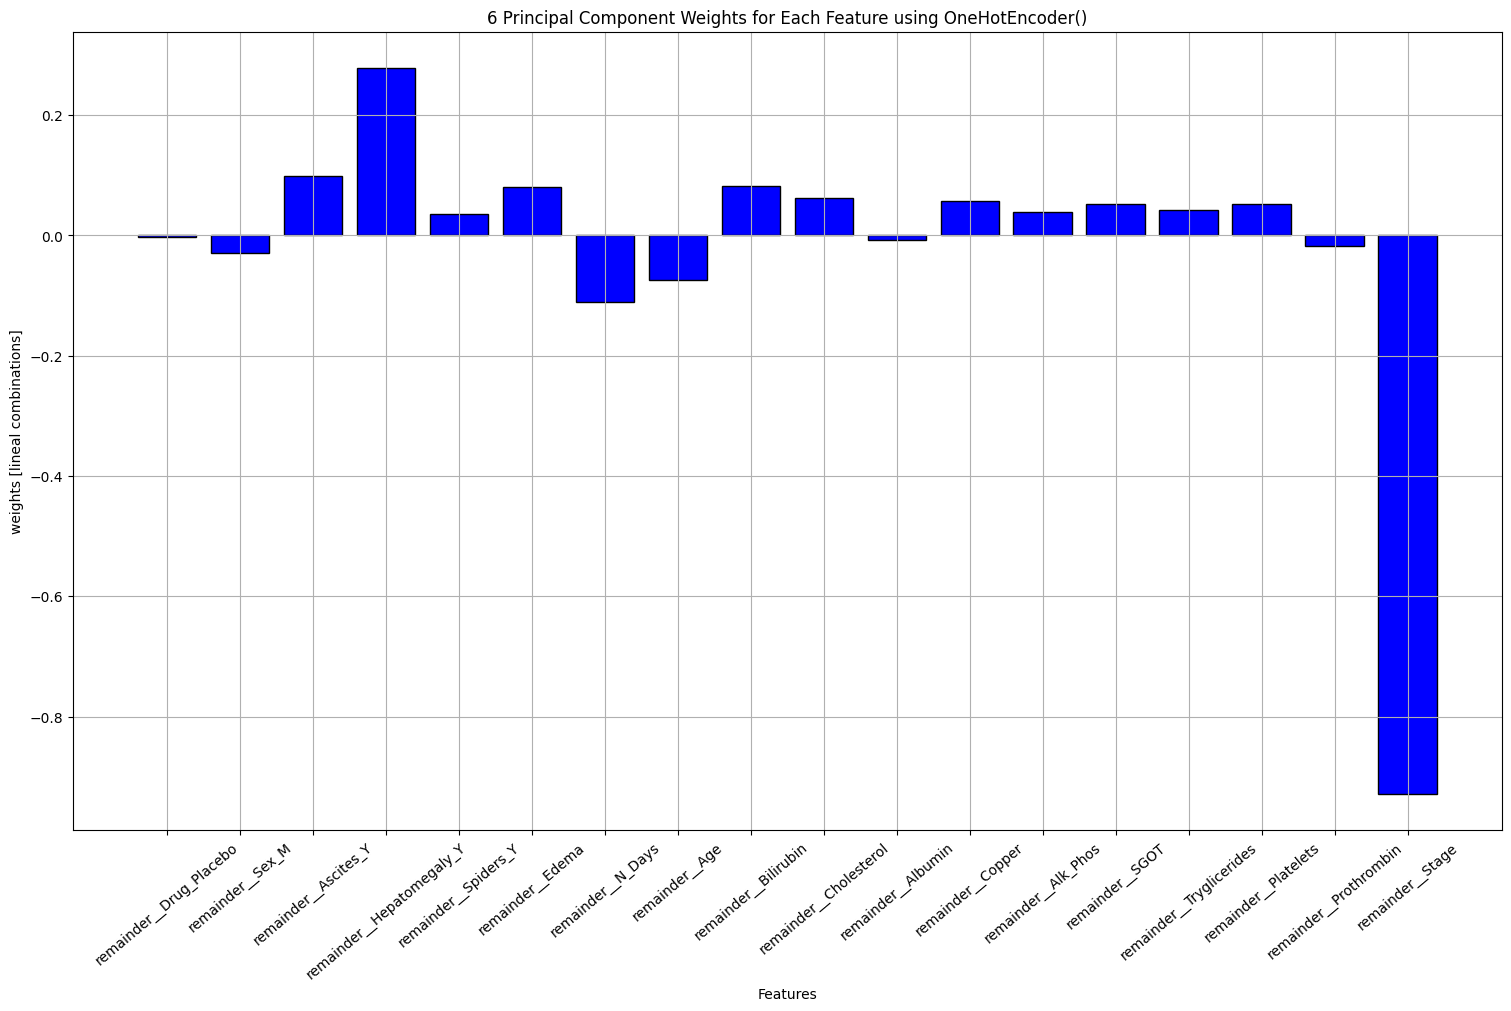

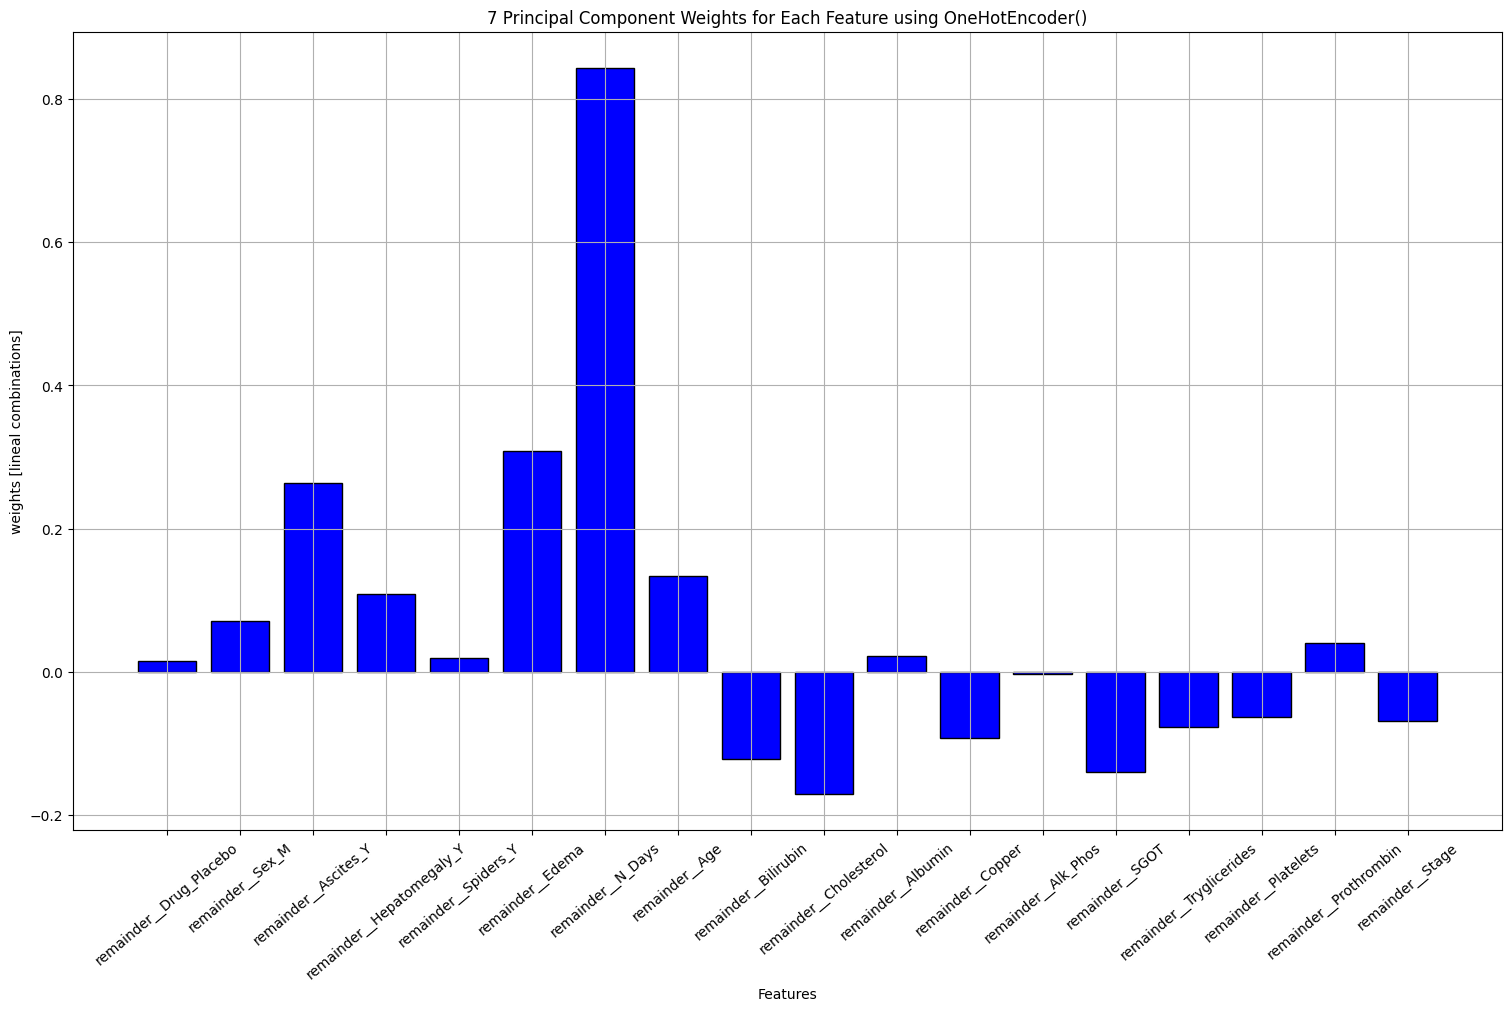

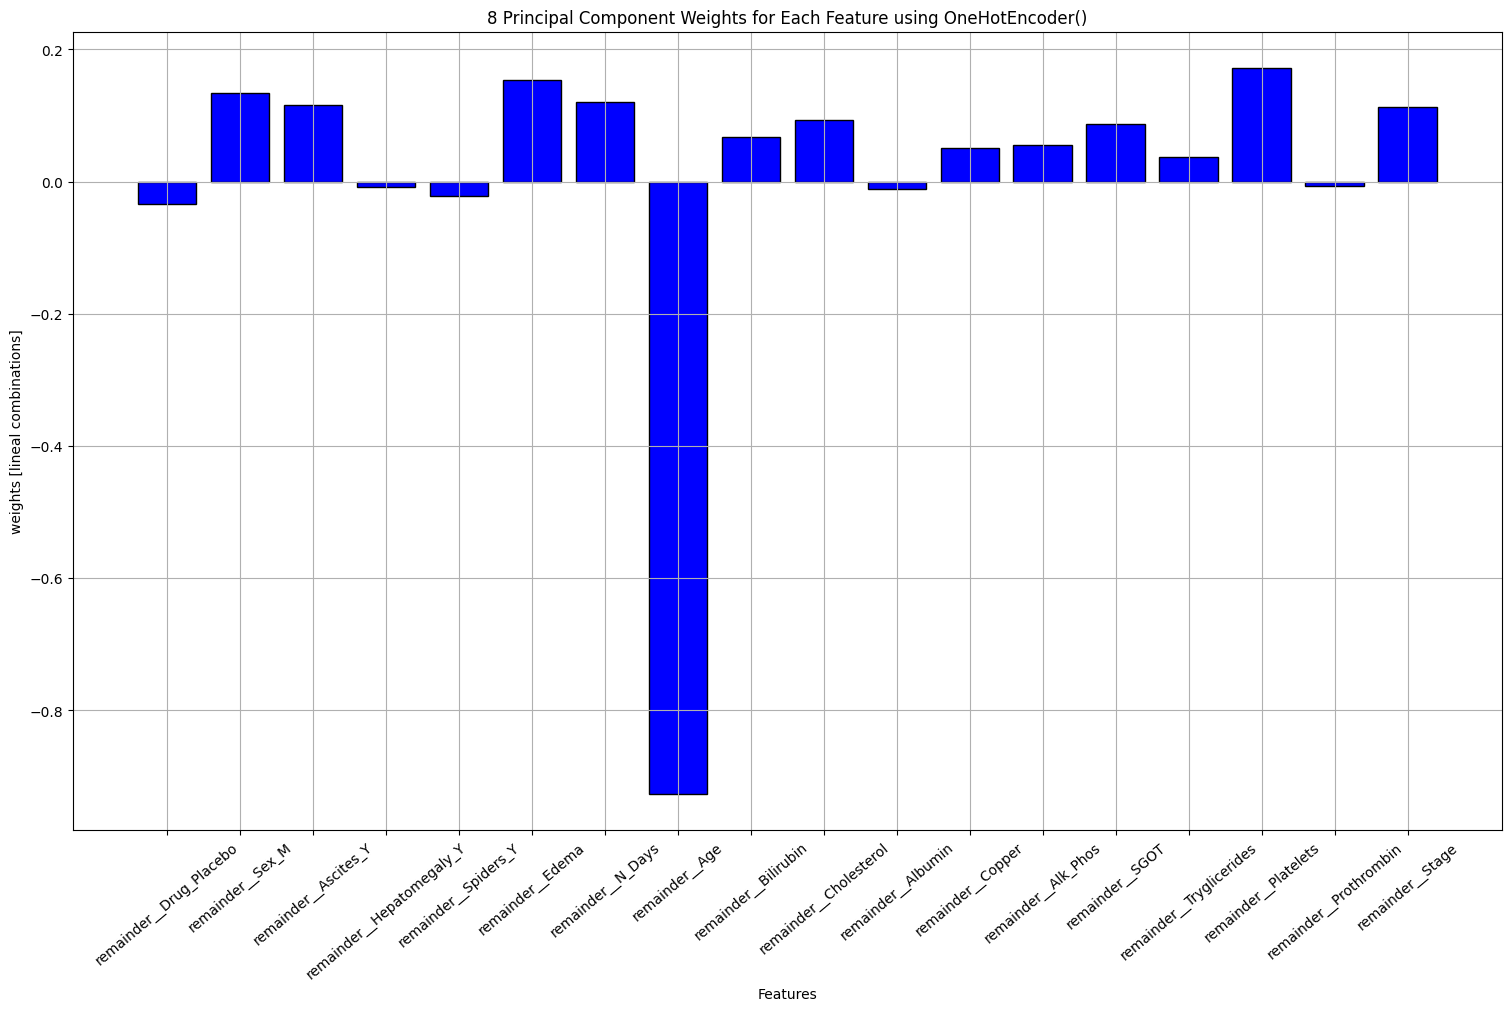

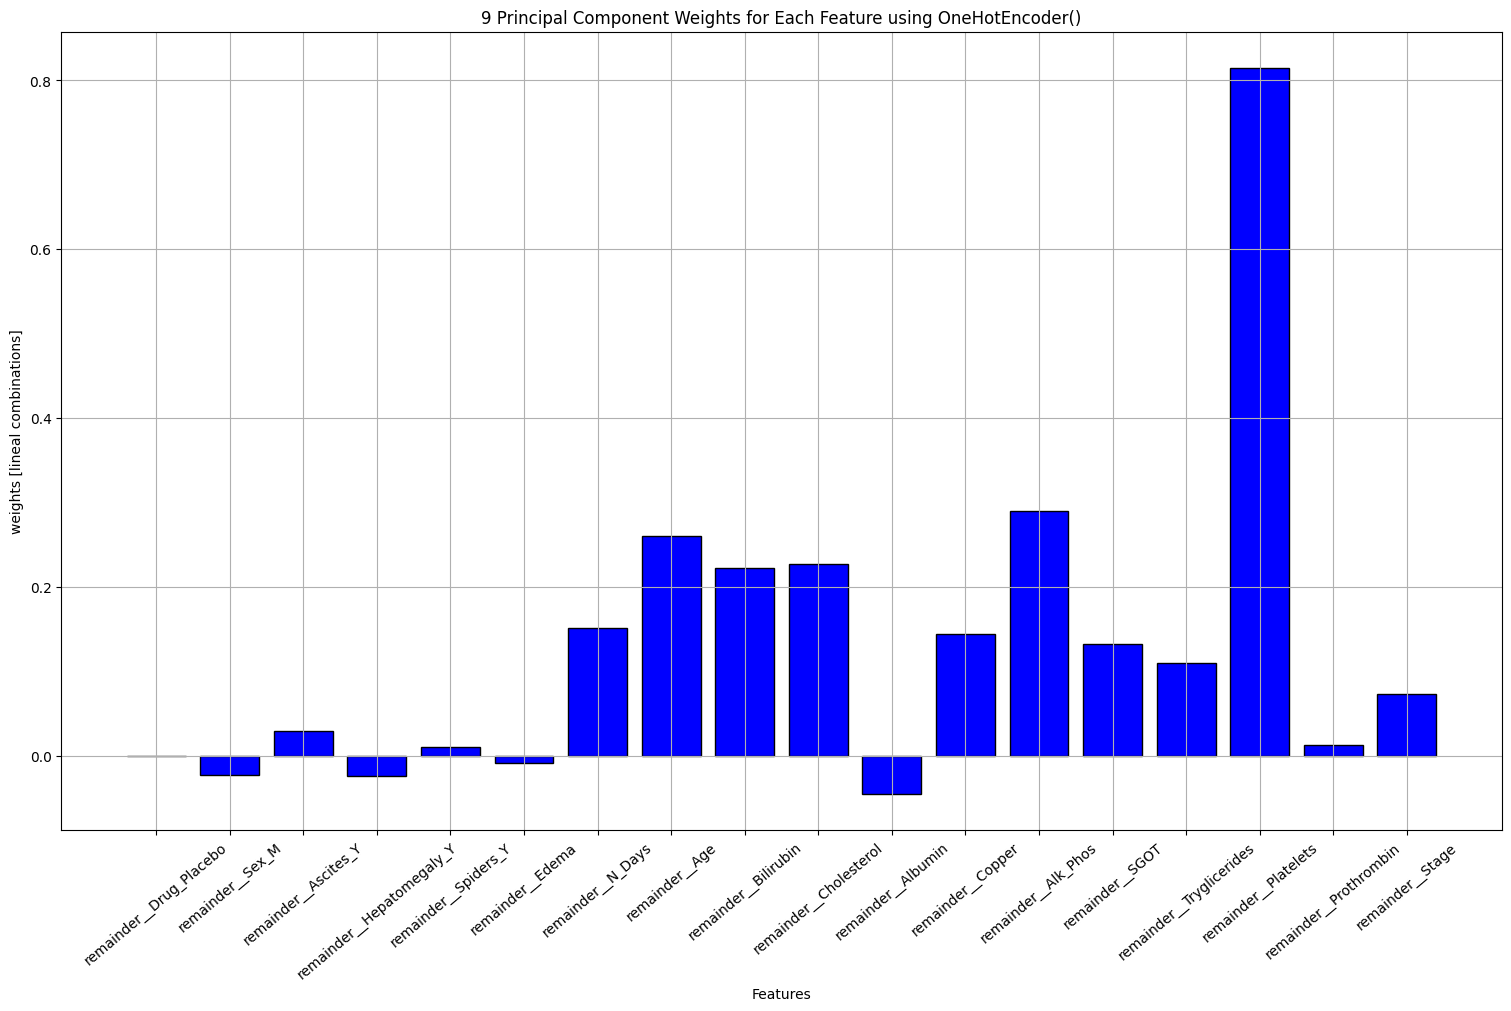

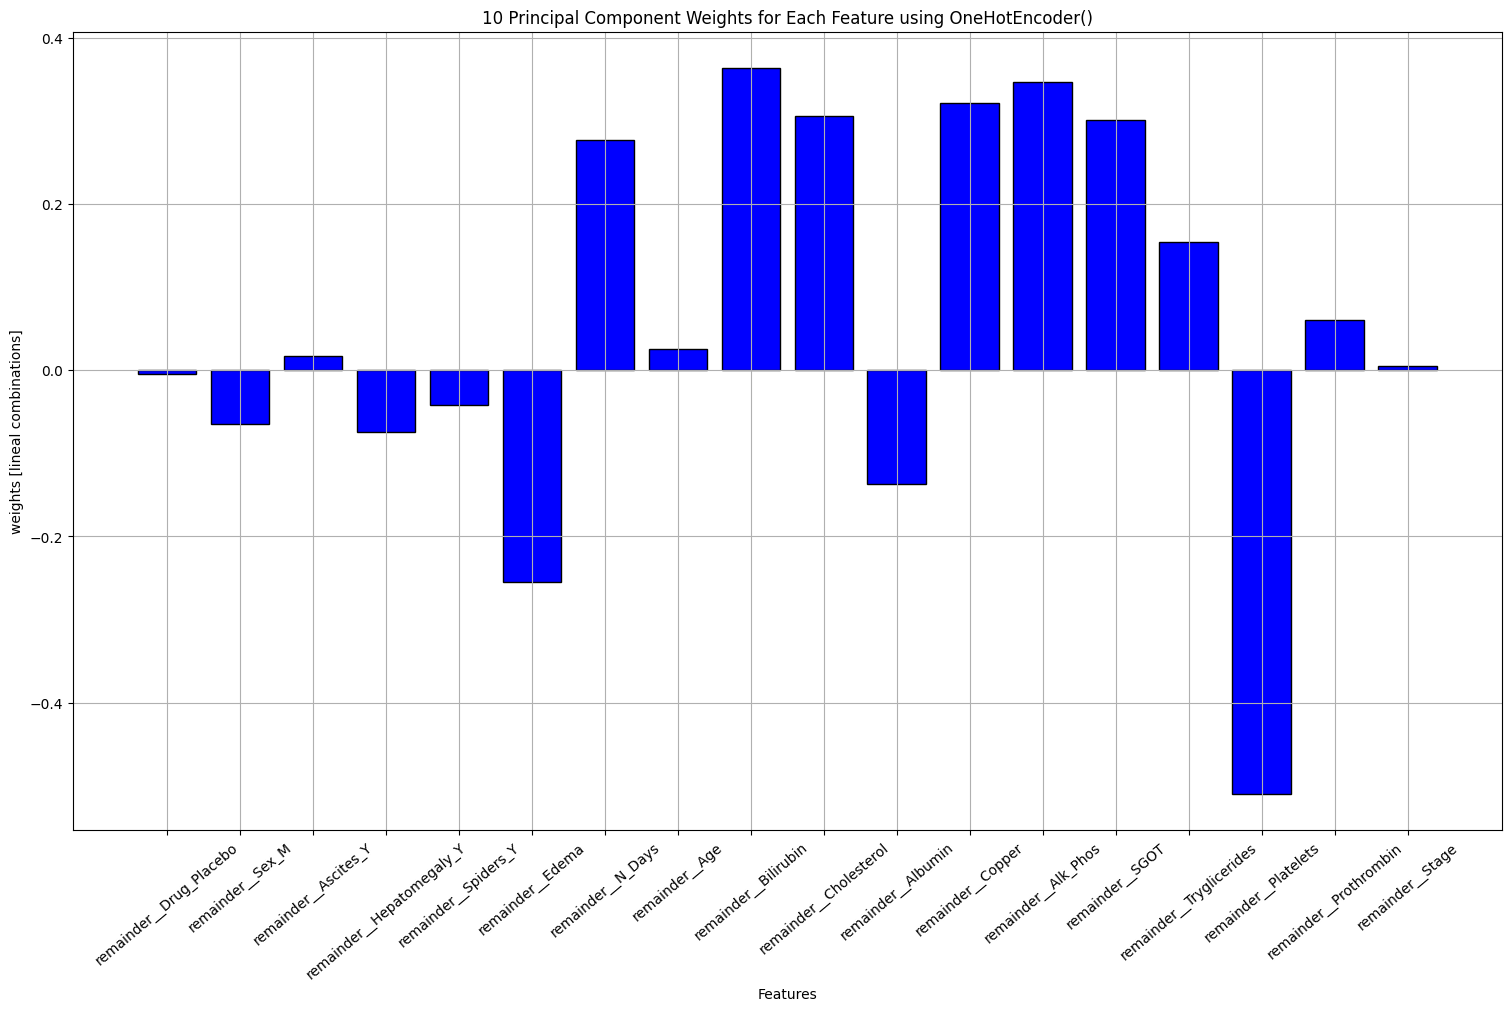

In [75]:
pc_minmax.study_case
pc_minmax.plot_variance_retained
pc_minmax.plot_feature_weights

In [76]:
PCAStudy.combined_study(pc_std,pc_minmax)

,ENCODER,ORIGINAL_FEATURES,ENCODED_FEATURES,NUMERICAL_TRANSFORMER,PCA_COMPONENTS,ORIGINAL_VARIANCE_RETAINED
0,OneHotEncoder(),18,18,StandardScaler(),10,0.746041
0,OneHotEncoder(),18,18,MinMaxScaler(),10,0.923906


**Results :**

In [121]:
data = np.vstack((  
                    selected_features['RandomForestClassifier'].to_list() + ['']*(len(X.columns) - len(selected_features['RandomForestClassifier'].to_list())) ,
                    selected_features['SVC'].to_list() + ['']*(len(X.columns) - len(selected_features['SVC'].to_list())),
                    features_sorted_by_importance_etc.values,
                    features_sorted_by_importance_brf.values,
                    features_sorted_by_importance_rbc.values,
                    X.columns[np.flip(np.argsort(np.abs(pc_std.eigenvectors[0,:])), axis=0)],
                    X.columns[np.flip(np.argsort(np.abs(pc_minmax.eigenvectors[0,:])), axis=0)]
                    
                    ))
print(data.shape)



index = [
                'Sequential feature selector SVC', 
                'Sequential feature selector SVC', 
                'ExtraTreesClassifier',
                'BalancedRandomForestClassifier',
                'RUSBoostClassifier',
                f'PCA {pc_std.num_transformer} ',
                f'PCA {pc_minmax.num_transformer} '

                
        ]
important_features_results = pd.DataFrame(data = data, columns = list(range(1,len(X.columns)+1)), index = index )



(5, 18)


In [119]:
y = selected_features['RandomForestClassifier'].to_list()
y = selected_features['RandomForestClassifier'].to_list() + ['']*(len(X.columns) - len(selected_features['RandomForestClassifier'].to_list()))
print(y)

['N_Days', 'Age', 'Bilirubin', 'Copper', 'Prothrombin', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [128]:
y = list(np.argsort(pc_std.eigenvectors[0,:]))
y.reverse()
print(y)

[8, 5, 11, 2, 3, 16, 4, 17, 13, 14, 9, 7, 12, 1, 0, 15, 10, 6]


In [131]:
np.flip(np.argsort(np.abs(pc_std.eigenvectors[0,:])), axis=0)

array([ 8,  5, 11,  2,  3,  6, 10, 16,  4, 17, 13, 14, 15,  9,  7, 12,  1,
        0], dtype=int64)

In [134]:
X.columns[np.flip(np.argsort(np.abs(pc_std.eigenvectors[0,:])), axis=0)]

Index(['Bilirubin', 'Edema', 'Copper', 'Ascites_Y', 'Hepatomegaly_Y', 'N_Days',
       'Albumin', 'Prothrombin', 'Spiders_Y', 'Stage', 'SGOT', 'Tryglicerides',
       'Platelets', 'Cholesterol', 'Age', 'Alk_Phos', 'Sex_M', 'Drug_Placebo'],
      dtype='object')

In [114]:
selected_features['RandomForestClassifier']

Index(['N_Days', 'Age', 'Bilirubin', 'Copper', 'Prothrombin'], dtype='object')